# Holm, et al - Isoform Analysis of RNASeq Data

### Aged Bone Marrow (normal control) vs. Myeloproliferative Neoplasms (MPN) 
### Genes/Isoforms
* ADAR1
* APOBECs
* STAT3
* STAT5B
* IL6ST

### Analyses
* APOBEC vs ADAR1 Correlation
* STAT3 vs ADAR1 Correlation
* STAT5B vs ADAR1 Correlation


In [6]:
#source("http://bioconductor.org/biocLite.R")
#devel = "http://bioconductor.org/packages/3.2/bioc"
#biocLite("EBSeq", siteRepos = devel, type="source")
#install.packages("ggpubr")

uninstalled.packages <- FALSE
if (uninstalled.packages) {
    source("https://bioconductor.org/biocLite.R")
    biocLite('Biobase')
    biocLite('Rsamtools')
    biocLite('limma')
    biocLite('edgeR')
    biocLite('Glimma')
    biocLite('ggplot2')
    biocLite('ggpubr')
    biocLite('EBSeq')
    biocLite('maftools')
    biocLite('org.Hs.eg.db')
    biocLite('WebGestaltR')
    biocLite('SPIA')
    biocLite('pathview')
    biocLite('GSVA')
    biocLite('GSEABase')
    biocLite('GSVAdata')
    biocLite('genefilter')
    biocLite('Homo.Sapiens')
    biocLite('TxDb.Hsapiens.UCSC.hg19.knownGene')
    biocLite('gdata')
    install.packages('plyr')
    install.packages('dplyr')
    install.packages('circlize')
    install.packages('reshape2')
    install.packages('RCircos')
    install.packages('data.table')
    install.packages('tidyverse')
    install.packages('splitstackshape')
    install.packages('randomforest')
}

In [7]:
library(IRdisplay)
library('limma')
library('edgeR')
library('Glimma')
library('ggplot2')
library('ggpubr')
library('EBSeq')
library('maftools')
library('org.Hs.eg.db')
library('WebGestaltR')
library('SPIA')
library('pathview')
library('GSVA')
library('GSEABase')
library('GSVAdata')
library('genefilter')
library('Homo.sapiens')
library('splitstackshape')
library('gdata')
library('PoiClaClu')
library('statmod')
library('plyr')
library('dplyr')
library('gdata')
library('reshape2')


EG2SYM <- toTable(org.Hs.egSYMBOL)
ENS2EG <- toTable(org.Hs.egENSEMBL2EG)
ENS2EG2SYM <- data.frame(gene_id=ENS2EG$gene_id, ens_id=ENS2EG, 
                         SYM=EG2SYM[match(ENS2EG$gene_id,EG2SYM$gene_id),"symbol"])

### Preprocess RNASeq Gene Count Data and metadata

In [8]:
gene_name <- "comp2"
gene_name2 <- "20180216"
genes_rsem_new <- read.csv("all_genes_results.txt", sep="\t", stringsAsFactors=FALSE)
dim(genes_rsem_new)
gene_counts_new <- genes_rsem_new[,sapply(colnames(genes_rsem_new), function(x) any(grepl(".results_expected_count",x)))]
colnames(gene_counts_new) <- gsub(".genes.results_expected_count","", colnames(gene_counts_new))
row.names(gene_counts_new) <- genes_rsem_new$gene_id
head(gene_counts_new)
    

[1] 57820   734

,X4259_GTGAAA_S0,X87,X97,X4727sp1,X22_15,X4215_GTGAAA_S0,X26_2,X4066_GTGAAA_S0,X91,X426_ACAGTG_S0,⋯,X670A.PB.Prog_S3,X664.Stroma_S6,X767_Stroma_S0,X600.PB.Prog_S0,X689.BM.Prog_S11,X666.PB.Stem_S3,X571.Stroma_S0,X672A.PB.Prog_S3,X591.BM.Stem_S0,X767.BM.Prog_S0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.10,65.00,38.00,0.00,377.00,228,151.00,221.00,60.00,13.00,51.0,⋯,9.00,762.00,420.00,217.00,63.00,64.00,13.00,4.00,19.00,219.00
ENSG00000000005.5,0.00,1.00,0.00,50.00,0,0.00,0.00,0.00,0.00,0.0,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419.8,1216.00,684.00,1442.00,451.00,373,1501.00,571.00,1695.00,715.00,1170.0,⋯,1787.00,1130.00,2541.00,1287.00,2163.00,892.00,888.00,3708.00,2472.00,1451.00
ENSG00000000457.9,1066.71,907.39,1244.89,322.88,229,877.56,819.19,697.84,414.76,918.1,⋯,746.18,302.92,187.13,525.52,684.85,924.19,254.78,470.46,266.73,1044.81
ENSG00000000460.12,2372.29,1066.61,1404.11,128.12,44,2212.44,297.81,1339.16,391.24,1744.9,⋯,543.82,129.08,112.87,295.48,1453.15,346.81,208.22,354.54,29.27,1254.19
ENSG00000000938.8,137.00,103.00,71.00,107.00,8,9.00,92.00,173.00,335.00,38.0,⋯,152.00,3153.00,15773.00,234.00,203.00,343.00,13697.00,737.00,49.00,416.00


In [9]:
genes <- AnnotationDbi::select(Homo.sapiens, keys=gsub("[.].*$","", rownames(gene_counts_new)), columns=c("SYMBOL", "ENSEMBL", "ENTREZID"), 
                keytype="ENSEMBL")
genes <- genes[!duplicated(genes$ENSEMBL),]
head(genes)

meta2 <- read.csv("combined_meta2.csv", stringsAsFactors=FALSE)
types <- unlist(lapply(meta2$ID, function(x) strsplit(x, split="\\.")[[1]][2]))  
meta2$CellType <- rep("BM", nrow(meta2))
meta2$CellType[which(!meta2$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))] <- types[which(!meta2$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))]
meta2$Sample.type2 <- meta2$Sample.type
meta2$Sample.type2[which(meta2$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))] <- "NBM"
meta2$Sample.type3 <- meta2$Sample.type
meta2$Sample.type3[which(meta2$Sample.type %in% c("Aged normal bone marrow"))] <- "ABM"
meta2$Sample.type3[which(meta2$Sample.type %in% c("Young normal bone marrow"))] <- "YBM"

meta2$Phenotype <- meta2$Sample.type
meta2$Phenotype[which(meta2$Sample.type %in% c("Aged normal bone marrow"))] <- "ABM"
meta2$Phenotype[which(meta2$Sample.type %in% c("Young normal bone marrow"))] <- "YBM"
    
gene_table_anno <- cbind(gene_counts_new, genes[match(gsub("[.].*$","", 
                                                           rownames(gene_counts_new)), genes$ENSEMBL),2:3])
meta2.Prog.filt <- meta2[meta2$Phenotype %in% c("ABM", "YBM", "CML", "AML", "ET", "PV", "MF") & 
                         meta2$Cell.type %in% c("Progenitor", "Sorted progenitors"),]
meta2.Prog.filt$Phenotype <- factor(as.character(meta2.Prog.filt$Phenotype), 
                                           levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "AML"))
dim(meta2.Prog.filt)
meta2.Prog.all.filt <- meta2[meta2$Cell.type %in% c("Sorted progenitors", "Progenitor"),]
gene.Prog.filt <- cbind(ENTREZ=gene_table_anno$ENTREZID, SYMBOL=gene_table_anno$SYMBOL, 
                        gene_table_anno[match(gsub("_S[0-9]*","", meta2.Prog.filt$Sample),
                                              gsub("_S[0-9]*", "", colnames(gene_table_anno)))])
meta2.Stem.filt <- meta2[meta2$Phenotype %in% c("ABM", "YBM", "CML", "AML", "ET", "PV", "MF") & 
                         meta2$Cell.type %in% c("Stem", "Sorted stem"),] 
meta2.Stem.filt$Phenotype <- factor(as.character(meta2.Stem.filt$Phenotype), 
                                           levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "AML"))
dim(meta2.Stem.filt)
meta2.Stem.all.filt <- meta2[meta2$Cell.type %in% c("Sorted stem", "Stem"),]
gene.Stem.filt <- cbind(ENTREZ=gene_table_anno$ENTREZID, SYMBOL=gene_table_anno$SYMBOL, 
                        gene_table_anno[match(gsub("_S[0-9]*","", meta2.Stem.filt$Sample),
                                              gsub("_S[0-9]*", "", colnames(gene_table_anno)))])


'select()' returned 1:many mapping between keys and columns


ENSEMBL,ENTREZID,SYMBOL
<chr>,<chr>,<chr>
ENSG00000000003,7105,TSPAN6
ENSG00000000005,64102,TNMD
ENSG00000000419,8813,DPM1
ENSG00000000457,57147,SCYL3
ENSG00000000460,55732,C1orf112
ENSG00000000938,2268,FGR


[1] 57 13

[1] 47 13

In [10]:
meta <- read.csv("fheditsHolm_Jamieson_RNAseq_with_controls_meta_20180326.csv", header=TRUE, stringsAsFactors = FALSE)
meta$Phenotype <- meta$Condition_code2
meta$Phenotype[which(meta$Condition_code2 %in% c("Aged_Normal","Young_Normal"))] <- "Normal"
meta$Phenotype2 <- meta$Condition_code2 
meta$Phenotype2[which(meta$Condition_code2 %in% c("Aged_Normal"))] <- "ABM"
meta$Phenotype2[which(meta$Condition_code2 %in% c("Young_Normal"))] <- "YBM"
meta_filt <- subset(meta, Phenotype %in% c("Normal", "MF", "PV", "ET", "CML", "AML") & 
                       Cell.type %in% c("Stem", "Progenitor"))
meta_filt$JAK2 <- meta_filt$Mutation
meta_filt$JAK2[meta_filt$JAK2 %in% c("JAK2V617F+","JAK2 V617F+")] <- "V617F+"
meta_filt$JAK2[meta_filt$JAK2 %in% c("JAK2 V617F-")] <- "V617F-"
meta_filt$JAK2[!meta_filt$JAK2 %in% c("V617F-", "V617F+")] <- NA
meta_filt$Tissue <- meta_filt$Tissue.Type
meta_filt$Cells <- meta_filt$Cell.type
head(meta_filt)
meta2.Prog.filt$Treatment_code2 <- factor(as.character(meta_filt[match(gsub("_S[0-9]+$","",meta2.Prog.filt$Sample), 
                              gsub("_S[0-9]+$","",meta_filt$Sample)),"Treatment_code2"]))
meta2.Stem.filt$Treatment_code2 <- factor(as.character(meta_filt[match(gsub("_S[0-9]+$","",meta2.Stem.filt$Sample), 
                              gsub("_S[0-9]+$","",meta_filt$Sample)),"Treatment_code2"]))
meta2.Prog.filt$Phenotype2 <- factor(as.character(meta_filt[match(gsub("_S[0-9]+$","",meta2.Prog.filt$Sample), 
                              gsub("_S[0-9]+$","",meta_filt$Sample)),"Phenotype2"]), 
                              levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "AML"))
meta2.Stem.filt$Phenotype2 <- factor(as.character(meta_filt[match(gsub("_S[0-9]+$","",meta2.Stem.filt$Sample), 
                              gsub("_S[0-9]+$","",meta_filt$Sample)),"Phenotype2"]),  
                              levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "AML"))
table(meta2.Prog.filt$Phenotype2)
table(meta2.Stem.filt$Phenotype2)

meta

,Sample,ID,Condition,Condition_code,Condition_code2,Treatment,Treatment_code,Treatment_code2,Tissue.Type,Tissue,⋯,Mutation,Mutation_code,Age,Age_code,Sex,Patient_ID,Phenotype,Phenotype2,JAK2,Cells
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,X735.PB.Stem,735.PB.Stem,AML,AML,AML,prev. chemo (not recent),previous_chemo,other,Peripheral Blood,Peripheral Blood,⋯,None,None,77,Aged,F,735,AML,AML,NA,Stem
2,X735.PB.Prog,735.PB.Prog,AML,AML,AML,prev. chemo (not recent),previous_chemo,other,Peripheral Blood,Peripheral Blood,⋯,None,None,77,Aged,F,735,AML,AML,NA,Progenitor
3,X591.PB.Stem,591.PB.Stem,AML,AML,AML,prev. on chemo and hydroxyurea,previous_chemo,other,Peripheral Blood,Peripheral Blood,⋯,JAK2 V617F-,JAK2_neg,80,Aged,M,591,AML,AML,V617F-,Stem
4,X591.BM.Stem,591.BM.Stem,AML,AML,AML,prev. on chemo and hydroxyurea,previous_chemo,other,Bone Marrow,Bone Marrow,⋯,JAK2 V617F-,JAK2_neg,81,Aged,M,591,AML,AML,V617F-,Stem
5,X591.BM.Prog,591.BM.Prog,AML,AML,AML,prev. on chemo and hydroxyurea,previous_chemo,other,Bone Marrow,Bone Marrow,⋯,JAK2 V617F-,JAK2_neg,81,Aged,M,591,AML,AML,V617F-,Progenitor
7,X672A.PB.Stem,672A.PB.Stem,AML (post-MF),AML (post-MF),AML,Jakafi (ruxolitinib phosphate),Jakafi,JAK2inhibitor,Peripheral Blood,Peripheral Blood,⋯,None,None,76,Aged,M,672A,AML,AML,NA,Stem



ABM YBM  ET  PV  MF CML AML 
  8   8   2   6  24   5   4 


ABM YBM  ET  PV  MF CML AML 
  4   4   2   3  24   5   5 

Sample,ID,Condition,Condition_code,Condition_code2,Treatment,Treatment_code,Treatment_code2,Tissue.Type,Tissue,Cell.type,Mutation,Mutation_code,Age,Age_code,Sex,Patient_ID,Phenotype,Phenotype2
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
X735.PB.Stem,735.PB.Stem,AML,AML,AML,prev. chemo (not recent),previous_chemo,other,Peripheral Blood,PB,Stem,None,None,77,Aged,F,735,AML,AML
X735.PB.Prog,735.PB.Prog,AML,AML,AML,prev. chemo (not recent),previous_chemo,other,Peripheral Blood,PB,Progenitor,None,None,77,Aged,F,735,AML,AML
X591.PB.Stem,591.PB.Stem,AML,AML,AML,prev. on chemo and hydroxyurea,previous_chemo,other,Peripheral Blood,PB,Stem,JAK2 V617F-,JAK2_neg,80,Aged,M,591,AML,AML
X591.BM.Stem,591.BM.Stem,AML,AML,AML,prev. on chemo and hydroxyurea,previous_chemo,other,Bone Marrow,BM,Stem,JAK2 V617F-,JAK2_neg,81,Aged,M,591,AML,AML
X591.BM.Prog,591.BM.Prog,AML,AML,AML,prev. on chemo and hydroxyurea,previous_chemo,other,Bone Marrow,BM,Progenitor,JAK2 V617F-,JAK2_neg,81,Aged,M,591,AML,AML
X591.Stroma,591.Stroma,AML,AML,AML,prev. on chemo and hydroxyurea,previous_chemo,other,Stroma,Stroma,Stroma,JAK2 V617F-,JAK2_neg,81,Aged,M,591,AML,AML
X672A.PB.Stem,672A.PB.Stem,AML (post-MF),AML (post-MF),AML,Jakafi (ruxolitinib phosphate),Jakafi,JAK2inhibitor,Peripheral Blood,PB,Stem,None,None,76,Aged,M,672A,AML,AML
X672A.PB.Prog,672A.PB.Prog,AML (post-MF),AML (post-MF),AML,Jakafi (ruxolitinib phosphate),Jakafi,JAK2inhibitor,Peripheral Blood,PB,Progenitor,None,None,76,Aged,M,672A,AML,AML
X672B.PB.Stem,672B.PB.Stem,AML (post-MF),AML (post-MF),AML,vidaza,other,other,Peripheral Blood,PB,Stem,None,None,76,Aged,M,672B,AML,AML


In [11]:
dim(meta2.Prog.filt)
dim(gene.Prog.filt)

[1] 57 15

[1] 57820    59

In [12]:
DGE.Prog <- DGEList(counts = gene.Prog.filt[,-c(1:2)], lib.size = colSums(gene.Prog.filt[,-c(1:2)]),
                      norm.factors = rep(1,ncol(gene.Prog.filt[,-c(1:2)])), samples = meta2.Prog.filt,
                      group = meta2.Prog.filt$Phenotype, 
                      genes = cbind(ENS=rownames(gene.Prog.filt), gene.Prog.filt[,c(1:2)]), remove.zeros = FALSE) 

DGE.Stem <- DGEList(counts = gene.Stem.filt[,-c(1:2)], lib.size = colSums(gene.Stem.filt[,-c(1:2)]),
                      norm.factors = rep(1,ncol(gene.Stem.filt[,-c(1:2)])), samples = meta2.Stem.filt,
                      group = meta2.Stem.filt$Phenotype, 
                      genes = cbind(ENS=rownames(gene.Stem.filt), gene.Stem.filt[,c(1:2)]), remove.zeros = FALSE) 
cpm3.Prog <- cpm(DGE.Prog, log=FALSE)
keep.exprs <- rowSums(cpm3.Prog>1)>=6
DGE3.Prog <- DGE.Prog[keep.exprs,, keep.lib.sizes=FALSE]
DGE3.Prog <- calcNormFactors(DGE3.Prog, method = "TMM")
lcpm3.Prog <- cpm(DGE3.Prog, log=TRUE)

DGE.Prog <- calcNormFactors(DGE.Prog, method = "TMM")
cpm2.Prog <- cpm(DGE.Prog, log=FALSE)
lcpm2.Prog <- cpm(DGE.Prog, log=TRUE)

cpm3.Stem <- cpm(DGE.Stem, log=FALSE)
keep.exprs <- rowSums(cpm3.Stem>1)>=6
DGE3.Stem <- DGE.Stem[keep.exprs,, keep.lib.sizes=FALSE]
DGE3.Stem <- calcNormFactors(DGE3.Stem, method = "TMM")
lcpm3.Stem <- cpm(DGE3.Stem, log=TRUE)

DGE.Stem <- calcNormFactors(DGE.Stem, method = "TMM")
cpm2.Stem <- cpm(DGE.Stem, log=FALSE)
lcpm2.Stem <- cpm(DGE.Stem, log=TRUE)

### Process expression of APOBECs in MPN dataset

In [13]:
APOBEC.genes <- genes[grep("APOBEC", genes$SYMBOL),]
APOBEC.genes
APOBEC.genes[APOBEC.genes$ENSEMBL %in% gsub("[.].*$","",rownames(lcpm3.Prog)),]
APOBEC.genes[APOBEC.genes$ENSEMBL %in% gsub("[.].*$","",rownames(lcpm3.Stem)),]


,ENSEMBL,ENTREZID,SYMBOL
,<chr>,<chr>,<chr>
2288,ENSG00000100298,164668,APOBEC3H
3997,ENSG00000111701,339,APOBEC1
5648,ENSG00000124701,10930,APOBEC2
6102,ENSG00000128383,200315,APOBEC3A
6104,ENSG00000128394,200316,APOBEC3F
13793,ENSG00000173627,403314,APOBEC4
15020,ENSG00000179750,9582,APOBEC3B
38250,ENSG00000239713,60489,APOBEC3G
40040,ENSG00000243811,140564,APOBEC3D


,ENSEMBL,ENTREZID,SYMBOL
,<chr>,<chr>,<chr>
2288,ENSG00000100298,164668,APOBEC3H
5648,ENSG00000124701,10930,APOBEC2
6102,ENSG00000128383,200315,APOBEC3A
6104,ENSG00000128394,200316,APOBEC3F
15020,ENSG00000179750,9582,APOBEC3B
38250,ENSG00000239713,60489,APOBEC3G
40040,ENSG00000243811,140564,APOBEC3D
40368,ENSG00000244509,27350,APOBEC3C


,ENSEMBL,ENTREZID,SYMBOL
,<chr>,<chr>,<chr>
2288,ENSG00000100298,164668,APOBEC3H
5648,ENSG00000124701,10930,APOBEC2
6104,ENSG00000128394,200316,APOBEC3F
15020,ENSG00000179750,9582,APOBEC3B
38250,ENSG00000239713,60489,APOBEC3G
40040,ENSG00000243811,140564,APOBEC3D
40368,ENSG00000244509,27350,APOBEC3C


In [14]:
lcpm.Prog.APOBECs <- do.call(cbind, c(meta2.Prog.filt, lapply(1:10, function(y)   {
        i <- APOBEC.genes[y,]
        t <- data.frame(as.numeric(lcpm2.Prog[gsub("[.].*$", "", rownames(lcpm2.Prog)) %in% i[1]]))
        colnames(t) <- i[3]
        return(t)
})))
lcpm.Stem.APOBECs <- do.call(cbind, c(meta2.Stem.filt, lapply(1:10, function(y)   {
        i <- APOBEC.genes[y,]
        t <- data.frame(LogCPM=as.numeric(lcpm2.Stem[gsub("[.].*$", "", rownames(lcpm2.Stem)) %in% i[1]]))
        colnames(t)<- i[3]
        return(t)
})))

## Supplemental Figure 2
### APOBEC3 Expression in MPN dataset for Progenitor and Hematopoietic Stem Cells

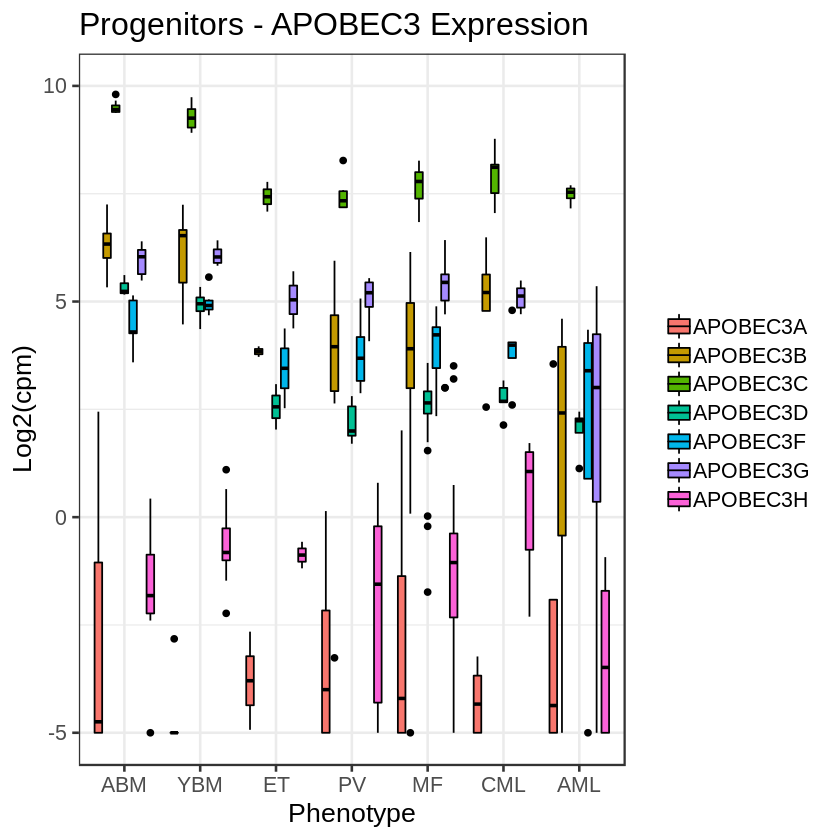

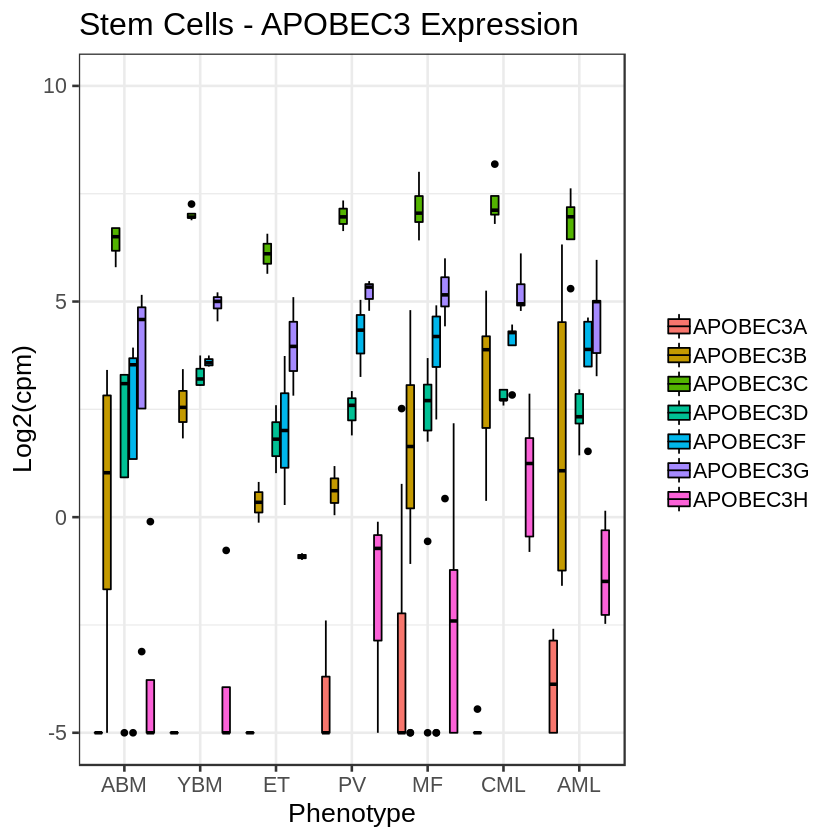

In [15]:
lcpm.Prog.APOBEC3 <- lcpm.Prog.APOBECs[,c(1:13, grep('APOBEC3', colnames(lcpm.Prog.APOBECs)))]
lcpm.Prog.APOBEC3.m <- melt(lcpm.Prog.APOBEC3[,-c(1:12)], id=c("Phenotype"))
lcpm.Prog.APOBEC3.m$variable <- factor(as.character(lcpm.Prog.APOBEC3.m$variable), 
                                      levels=c("APOBEC3A", "APOBEC3B", "APOBEC3C", "APOBEC3D", 
                                              "APOBEC3F", "APOBEC3G", "APOBEC3H"))
lcpm.Prog.APOBEC3.m$value[lcpm.Prog.APOBEC3.m$value < -5] <- -5

lcpm.Stem.APOBEC3 <- lcpm.Stem.APOBECs[,c(1:13, grep('APOBEC3', colnames(lcpm.Stem.APOBECs)))]
lcpm.Stem.APOBEC3.m <- melt(lcpm.Stem.APOBEC3[,-c(1:12)], id=c("Phenotype"))
lcpm.Stem.APOBEC3.m$variable <- factor(as.character(lcpm.Stem.APOBEC3.m$variable), 
                                      levels=c("APOBEC3A", "APOBEC3B", "APOBEC3C", "APOBEC3D", 
                                              "APOBEC3F", "APOBEC3G", "APOBEC3H"))
lcpm.Stem.APOBEC3.m$value[lcpm.Stem.APOBEC3.m$value < -5] <- -5 
#png(file="MPN_Prog_APOBEC3expr_boxplot.png", width=7, height=7, units='in', res=300)
ggboxplot(lcpm.Prog.APOBEC3.m, x="Phenotype", y="value", fill="variable", ylim=c(-5,10)) +
    theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Progenitors - APOBEC3 Expression") +
    theme(legend.title=element_text(size=0))
#dev.off()

#png(file="MPN_HSC_APOBEC3expr_boxplot.png", width=7, height=7, units='in', res=300)
ggboxplot(lcpm.Stem.APOBEC3.m, x="Phenotype", y="value", fill="variable", ylim=c(-5,10)) +
    theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Stem Cells - APOBEC3 Expression") +
    theme(legend.title=element_text(size=0))
#dev.off()

In [16]:
lcpm.Prog.APOBEC3C <- do.call(cbind, c(meta2.Prog.filt, lapply(10, function(y)   {
    i <- APOBEC.genes[y,]
    t <- data.frame(as.numeric(lcpm2.Prog[gsub("[.].*$", "", rownames(lcpm2.Prog)) %in% i[1]]))
    colnames(t) <- i[3]
    return(t)
})))
lcpm.Prog.APOBEC3C.All <- lcpm.Prog.APOBEC3C[-grep('672A', lcpm.Prog.APOBEC3C$Sample),]
head(lcpm.Prog.APOBEC3C.All)
lcpm.Prog.APOBEC3C <- lcpm.Prog.APOBEC3C[lcpm.Prog.APOBEC3C$Sample.type2 %in% "MF",]
lcpm.Stem.APOBEC3C <- do.call(cbind, c(meta2.Stem.filt, lapply(10, function(y)   {
    i <- APOBEC.genes[y,]
    t <- data.frame(LogCPM=as.numeric(lcpm2.Stem[gsub("[.].*$", "", rownames(lcpm2.Stem)) %in% i[1]]))
    colnames(t)<- i[3]
    return(t)
})))
lcpm.Stem.APOBEC3C.All <- lcpm.Stem.APOBEC3C
lcpm.Stem.APOBEC3C <- lcpm.Stem.APOBEC3C[lcpm.Stem.APOBEC3C$Sample.type2 %in% "MF",]

lcpm.Prog.APOBEC3C$APOBEC3C.expr <- ifelse(lcpm.Prog.APOBEC3C$APOBEC3C > 7.5, "High", "Low")
lcpm.Stem.APOBEC3C$APOBEC3C.expr <- ifelse(lcpm.Stem.APOBEC3C$APOBEC3C > 7.2, "High", "Low")
dim(lcpm.Prog.APOBEC3C)
dim(lcpm.Stem.APOBEC3C)
head(lcpm.Stem.APOBEC3C)
lcpm.APOBEC3C.list <- list(Prog=lcpm.Prog.APOBEC3C, Stem=lcpm.Stem.APOBEC3C)

File_ID,Sample,ID,Sample.type,Age,Condition,Cell.type,Patient_ID,Mutation,CellType,Sample.type2,Sample.type3,Phenotype,Treatment_code2,Phenotype2,APOBEC3C
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
368_ACAGTG_S0,X368_ACAGTG_S0,pt368,Aged normal bone marrow,Aged,Normal,Sorted progenitors,368,Normal,BM,NBM,ABM,ABM,Healthy Control,ABM,9.382343
380_ACAGTG_S0,X380_ACAGTG_S0,pt380,Aged normal bone marrow,Aged,Normal,Sorted progenitors,380,Normal,BM,NBM,ABM,ABM,Healthy Control,ABM,9.373829
401_ACAGTG_S0,X401_ACAGTG_S0,pt401,Aged normal bone marrow,Aged,Normal,Sorted progenitors,401,Normal,BM,NBM,ABM,ABM,Healthy Control,ABM,9.468969
402_ACAGTG_S0,X402_ACAGTG_S0,pt402,Aged normal bone marrow,Aged,Normal,Sorted progenitors,402,Normal,BM,NBM,ABM,ABM,Healthy Control,ABM,9.510658
410_ACAGTG_S0,X410_ACAGTG_S0,pt410,Aged normal bone marrow,Aged,Normal,Sorted progenitors,410,Normal,BM,NBM,ABM,ABM,Healthy Control,ABM,9.658576
415_ACAGTG_S0,X415_ACAGTG_S0,pt415,Aged normal bone marrow,Aged,Normal,Sorted progenitors,415,Normal,BM,NBM,ABM,ABM,Healthy Control,ABM,9.803090


[1] 24 17

[1] 24 17

,File_ID,Sample,ID,Sample.type,Age,Condition,Cell.type,Patient_ID,Mutation,CellType,Sample.type2,Sample.type3,Phenotype,Treatment_code2,Phenotype2,APOBEC3C,APOBEC3C.expr
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>
17,X407.PB.Stem,X407.PB.Stem,407.PB.Stem,MF,Mid,myelofibrosis,Stem,407,JAK2 V617F-,PB,MF,MF,MF,JAK2inhibitor,MF,6.492043,Low
18,X422.PB.Stem,X422.PB.Stem,422.PB.Stem,MF,Mid,myelofibrosis_fromMDS,Stem,422,JAK2 V617F-,PB,MF,MF,MF,Shh_inhibitor,MF,7.043569,Low
19,X428.PB.Stem,X428.PB.Stem,428.PB.Stem,MF,Mid,myelofibrosis_postET,Stem,428,JAK2 V617F-,PB,MF,MF,MF,JAK2inhibitor,MF,6.993058,Low
20,X560.PB.Stem,X560.PB.Stem,560.PB.Stem,MF,Aged,myelofibrosis,Stem,560,JAK2 V617F+,PB,MF,MF,MF,JAK2inhibitor,MF,7.837465,High
21,X566.PB.Stem,X566.PB.Stem,566.PB.Stem,MF,Aged,myelofibrosis,Stem,566,JAK2 V617F-,PB,MF,MF,MF,JAK2inhibitor,MF,7.685137,High
22,X567.PB.Stem,X567.PB.Stem,567.PB.Stem,MF,Mid,myelofibrosis,Stem,567,JAK2 V617F-,PB,MF,MF,MF,pacritinib,MF,7.725880,High


In [18]:
risk.meta <- read.csv(file="DNA_RNA_combined_meta_06072018.csv", stringsAsFactors=FALSE)
head(risk.meta)
risk.meta$Condition2 <- risk.meta$Condition
risk.meta$Condition <- gsub("_1|_2", "", gsub("_PostPV|_PostET", "", risk.meta$Condition))
risk.meta$Condition <- gsub("HR_MF", "High_Risk", risk.meta$Condition)
risk.meta$Condition <- gsub("Int_MF", "Int_Risk", risk.meta$Condition)
risk.meta$Condition <- gsub("LR_MF", "Low_Risk", risk.meta$Condition)
table(risk.meta$Cell_type)
risk.meta.Prog <- risk.meta[risk.meta$Cell_type %in% "Progenitor",]
table(risk.meta.Prog$Condition, risk.meta.Prog$Sample_type)
risk.meta.Stem <- risk.meta[risk.meta$Cell_type %in% "Stem",]
table(risk.meta.Stem$Condition, risk.meta.Stem$Sample_type)

Sample,Sample_type,Condition,Cell_type,Patient_ID,Mutation,Treatment_type,Tumor_Sample_Barcode
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
721-34plus,MF,Int_2_MF,CD34pos,721,JAK2.V617F+,Jak2.Inhibitor,721
735-Prog,AML,AML,Progenitor,735,NA,hydroxyurea,735
727-Prog,CML,AP_CML,Progenitor,727,BCR-ABL+,Untreated,727
608-Prog,CML,BC_CML,Progenitor,608,BCR-ABL+,TKI,608
703-Prog,CML,CML,Progenitor,703,BCR-ABL+,hydroxyurea,703
571-Prog,CML,CP_CML,Progenitor,571,BCR-ABL+,Untreated,571



   CD34pos Progenitor       Stem     Stroma 
         1         69         45         23 

           
            Aged.normal.bone.marrow AML CML ET MF PV Young.normal.bone.marrow
  AML                             0   1   0  0  0  0                        0
  AP_CML                          0   0   1  0  0  0                        0
  BC_CML                          0   0   1  0  0  0                        0
  CML                             0   0   1  0  0  0                        0
  CP_CML                          0   0   2  0  0  0                        0
  Diseased                        0   0   0  0  0  0                        0
  ET                              0   0   0  2  0  0                        0
  High_Risk                       0   0   0  0  7  0                        0
  Int_Risk                        0   0   0  0 15  2                        0
  Low_Risk                        0   0   0  0  1  0                        0
  Normal                          8   0   0  0  0  0                        8
  PV                              0   0   0  0  0  4

           
            Aged.normal.bone.marrow AML CML ET MF PV Young.normal.bone.marrow
  AML                             0   1   0  0  0  0                        0
  AP_CML                          0   0   1  0  0  0                        0
  BC_CML                          0   0   1  0  0  0                        0
  CML                             0   0   1  0  0  0                        0
  CP_CML                          0   0   2  0  0  0                        0
  ET                              0   0   0  2  0  0                        0
  High_Risk                       0   0   0  0  9  0                        0
  Int_Risk                        0   0   0  0 13  1                        0
  Low_Risk                        0   0   0  0  1  0                        0
  Normal                          4   0   0  0  0  0                        4
  PV                              0   0   0  0  0  2                        0
  sAML                            0   3   0  0  0  0

In [19]:
lcpm.Stem.APOBEC3C$Risk <- risk.meta.Stem[match(lcpm.Prog.APOBEC3C$Patient_ID, risk.meta.Stem$Tumor_Sample_Barcode),"Condition"]
lcpm.Prog.APOBEC3C$Risk <- risk.meta.Prog[match(lcpm.Prog.APOBEC3C$Patient_ID, risk.meta.Prog$Tumor_Sample_Barcode),"Condition"]
lcpm.Stem.APOBEC3C$Risk[lcpm.Stem.APOBEC3C$Patient_ID %in% c("670B", "724")] <- "Int_Risk"

table(lcpm.Stem.APOBEC3C$Risk)
table(lcpm.Prog.APOBEC3C$Risk)


High_Risk  Int_Risk  Low_Risk 
        7        16         1 


High_Risk  Int_Risk  Low_Risk 
        7        16         1 

### Preprocess RNASeq Isoform Count Data and metadata

In [20]:
name <- "iso_comp"
name2 <- "20180417"
iso_rsem_new <- read.csv("all_isoforms_results_noControls.txt", sep="\t", stringsAsFactors=FALSE)
dim(iso_rsem_new)
iso_counts_new <- iso_rsem_new[,sapply(colnames(iso_rsem_new), function(x) any(grepl(".results_expected_count",x)))]
colnames(iso_counts_new) <- gsub(".isoforms.results_expected_count","", colnames(iso_counts_new))
row.names(iso_counts_new) <- iso_rsem_new$transcript_id
head(iso_counts_new)
    
iso_gene_table <- iso_rsem_new[,1:2]

iso_rsem_control <- read.csv("all_isoforms_results.txt", sep="\t", stringsAsFactors=FALSE)
dim(iso_rsem_control)
iso_counts_control <- iso_rsem_control[,sapply(colnames(iso_rsem_control), function(x) any(grepl(".results_expected_count",x)))]
colnames(iso_counts_control) <- gsub(".isoforms.results_expected_count","", colnames(iso_counts_control))
row.names(iso_counts_control) <- iso_rsem_control$transcript_id
head(iso_counts_control)

[1] 196520    566

,X689.BM.Prog_S11,X407.PB.Stem_S0,X767.BM.Stem_S0,X670B.PB.Stem_S5,X668.PB.Stem_S4,X573.BM.Prog_S0,X638.BM.Stem_S1,X599.PB.Stem_S0,X668.PB.Prog_S2,X573.Stroma_S3,⋯,X664.BM.Prog_S4,X767.BM.Prog_S0,X662.Stroma_S1,X672A.PB.Stem_S5,X431.PB.Prog_S0,X689.BM.Stem_S0,X728.Stroma_S6,X591.BM.Prog_S0,X621.PB.Prog_S2,X744.PB.Stem_S0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENST00000373020.4,54.09,136.00,365.18,51.00,160.14,23.00,72,75.03,67.90,126.0,⋯,17.00,193.34,47.00,20.09,150.95,53.50,1767.08,0,123.0,230.48
ENST00000494424.1,1.59,0.00,8.64,0.00,1.88,0.00,0,0.00,1.87,0.0,⋯,0.00,8.59,0.00,0.00,0.00,0.00,3.18,0,0.0,6.69
ENST00000496771.1,7.32,0.00,47.18,0.00,7.99,0.00,0,11.97,9.22,0.0,⋯,0.00,17.08,0.00,5.91,7.05,7.50,22.74,0,0.0,23.83
ENST00000373031.4,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.0,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.0,0.00
ENST00000485971.1,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.0,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.0,0.00
ENST00000371582.4,108.01,32.71,93.68,140.72,61.88,84.87,0,48.88,142.23,128.4,⋯,209.43,140.22,47.99,64.11,337.31,178.95,218.63,0,106.9,116.99


[1] 196520    308

,X36,X22_13,X22_6,X4689sp1,X22_10,X26_6,X4066_GTGAAA_S0,X4215_GTGAAA_S0,X48_MDStoAML,X368_ACAGTG_S0,⋯,X4727sp1,X380_ACAGTG_S0,X4040_GTGAAA_S0,X94,X416_ACAGTG_S0,X102,X65_MDStoAML,X42,X22_16,X91
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENST00000373020.4,0.00,338,205,446.54,333.00,73.89,60.00,151.00,9.00,71.00,⋯,377.00,47.00,12.63,11.00,72.00,11.00,47.57,0.00,209,13.0
ENST00000494424.1,0.00,0,0,1.37,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,1.37,0.00,0.00,0.00,2.43,0.00,0,0.0
ENST00000496771.1,0.00,0,0,18.10,0.00,11.11,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.0
ENST00000373031.4,0.00,43,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.0
ENST00000485971.1,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.0
ENST00000371582.4,211.69,0,0,74.98,56.01,0.00,183.88,222.53,300.77,146.96,⋯,21.27,88.21,150.20,109.56,48.51,109.64,20.58,37.74,0,45.4


In [21]:
isos <- AnnotationDbi::select(Homo.sapiens, keys=gsub("[.].*$","", iso_gene_table$gene_id), columns=c("SYMBOL", "ENSEMBL", "ENTREZID"), 
                keytype="ENSEMBL")
iso_gene_table_anno <- cbind(iso_gene_table, isos[match(gsub("[.].*$","", iso_gene_table$gene_id), isos$ENSEMBL),2:3])


'select()' returned many:many mapping between keys and columns


In [22]:
risk.colors <- RColorBrewer::brewer.pal(n = 12,name = 'Paired')
names(risk.colors) <- c("AP_CML", "CML", "CP_CML", "CLL", "ET", "PV", "IR_MF", "HR_MF", "MF", "NBM", "placeholder","AML")
risk.colors.sub <- risk.colors[names(risk.colors) %in% c("NBM", "PV", "ET", "MF", "CML", "AML")] 
risk.order <- as.numeric(factor(names(risk.colors.sub), levels=c("NBM", "PV", "ET", "MF", "CML", "AML")))
risk.order
risk.colors.sub2 <- risk.colors.sub[risk.order]

[1] 5 3 2 4 1 6

In [23]:
load("gencodev19_ANNOT.RData")
ANNOT_out <- merge(ANNOT, iso_counts_control, by.x="transcript_id", by.y="row.names", all.y=TRUE)
ANNOT_protein_coding <- subset(ANNOT, gene_type == "protein_coding")
ANNOT_ncRNA <- subset(ANNOT, gene_type %in% c("lincRNA", "antisense", "processed_transcript","sense_overlapping", "sense_intronic") )
#make list of IDs to query
protein_coding_ids <- ANNOT_protein_coding$gene_id
ncRNA_ids <- ANNOT_ncRNA$gene_id

iso_gene_table_anno_pc <- iso_gene_table_anno[gsub("[.].*$","", iso_gene_table_anno$gene_id) %in%
                                             gsub("[.].*$","", protein_coding_ids),]
iso_counts_control_pc <- iso_counts_control[rownames(iso_counts_control) %in% iso_gene_table_anno_pc$transcript_id,]
iso_counts_new_pc <- iso_counts_new[rownames(iso_counts_new) %in% iso_gene_table_anno_pc$transcript_id,]
rownames(iso_counts_control_pc) <- gsub("[.].*$","", rownames(iso_counts_control_pc))
rownames(iso_counts_new_pc) <- gsub("[.].*$","", rownames(iso_counts_new_pc))
colnames(iso_counts_new_pc) <- gsub("X767_Stroma", "X767.Stroma", 
                                  gsub("X689_Stroma", "X689.Stroma", colnames(iso_counts_new_pc)))


In [24]:
meta2 <- meta2[-grep("X672A.PB.Prog_S3", meta2$Sample),]
meta2$Treatment_code2 <- NA
meta2$Treatment_code2 <- meta$Treatment_code2[match(gsub("_S[0-9]*$","",meta2$Sample), 
                                                    gsub("_S[0-9]*$","",meta$Sample))]
meta2[meta2$Treatment_code2 %in% c("pacritinib"), "Treatment_code2"] <- "JAK2inhibitor"
meta2$Condition_code <- NA
meta2$Risk <- meta$Condition_code[match(gsub("_S[0-9]*$","",meta2$Sample), 
                                                    gsub("_S[0-9]*$","",meta$Sample))]

In [25]:
NBM.Prog.meta <- meta2[which(meta2$Sample.type2 %in% c("NBM") &
             meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
ABM.Prog.meta <- meta2[which(meta2$Sample.type3 %in% c("ABM") &
             meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
YBM.Prog.meta <- meta2[which(meta2$Sample.type3 %in% c("YBM") &
             meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
PV.Prog.meta <- meta2[which(meta2$Sample.type %in% c("PV") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
ET.Prog.meta <- meta2[which(meta2$Sample.type %in% c("ET") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
MF.Prog.meta <- meta2[which(meta2$Sample.type %in% c("MF") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
MDS.Prog.meta <- meta2[which(meta2$Sample.type4 %in% c("MDS") & meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
MDS.Prog.meta
CML.Prog.meta <- meta2[which(meta2$Sample.type %in% c("CML") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
AML.Prog.meta <- meta2[which(meta2$Sample.type %in% c("AML") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]

NBM.Prog.samps <- match(NBM.Prog.meta$Sample, colnames(iso_counts_control_pc))
ABM.Prog.samps <- match(ABM.Prog.meta$Sample, colnames(iso_counts_control_pc))
YBM.Prog.samps <- match(YBM.Prog.meta$Sample, colnames(iso_counts_control_pc))

PV.Prog.samps <- match(gsub("_S[0-9]+$", "", PV.Prog.meta$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
ET.Prog.samps <- match(gsub("_S[0-9]+$", "", ET.Prog.meta$Sample),
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
MF.Prog.samps <- match(gsub("_S[0-9]+$", "", MF.Prog.meta$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))

CML.Prog.samps <- match(gsub("_S[0-9]+$", "", CML.Prog.meta$Sample), 
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
AML.Prog.samps <- match(gsub("_S[0-9]+$", "", AML.Prog.meta$Sample),
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
NBM.Prog.BM.meta <- NBM.Prog.meta[which(NBM.Prog.meta$CellType %in% "BM"),]
ABM.Prog.BM.meta <- ABM.Prog.meta[which(ABM.Prog.meta$CellType %in% "BM"),]
YBM.Prog.BM.meta <- YBM.Prog.meta[which(YBM.Prog.meta$CellType %in% "BM"),]
PV.Prog.BM.meta <- PV.Prog.meta[which(PV.Prog.meta$CellType %in% "BM"),]
ET.Prog.BM.meta <- ET.Prog.meta[which(ET.Prog.meta$CellType %in% "BM"),]
MF.Prog.BM.meta <- MF.Prog.meta[which(MF.Prog.meta$CellType %in% "BM"),]
CML.Prog.BM.meta <- CML.Prog.meta[which(CML.Prog.meta$CellType %in% "BM"),]
AML.Prog.BM.meta <- AML.Prog.meta[which(AML.Prog.meta$CellType %in% "BM"),]

NBM.Prog.BM.samps <- match(NBM.Prog.BM.meta$Sample, colnames(iso_counts_control_pc))
ABM.Prog.BM.samps <- match(ABM.Prog.BM.meta$Sample, colnames(iso_counts_control_pc))
YBM.Prog.BM.samps <- match(YBM.Prog.BM.meta$Sample, colnames(iso_counts_control_pc))
PV.Prog.BM.samps <- match(gsub("_S[0-9]+$", "", PV.Prog.BM.meta$Sample),
                          gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
ET.Prog.BM.samps <- match(gsub("_S[0-9]+$", "", ET.Prog.BM.meta$Sample),
                          gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
MF.Prog.BM.samps <- match(gsub("_S[0-9]+$", "", MF.Prog.BM.meta$Sample),
                          gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
CML.Prog.BM.samps <- match(gsub("_S[0-9]+$", "", CML.Prog.BM.meta$Sample),
                           gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
AML.Prog.BM.samps <- match(gsub("_S[0-9]+$", "", AML.Prog.BM.meta$Sample),
                           gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))


File_ID,Sample,ID,Sample.type,Age,Condition,Cell.type,Patient_ID,Mutation,CellType,Sample.type2,Sample.type3,Phenotype,Treatment_code2,Condition_code,Risk
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>


In [26]:
#colnames(iso_counts_new)
meta2.Prog.filt2 <- meta2.Prog.filt[-grep("X672A.PB.Prog_S3", meta2.Prog.filt$Sample),]
meta2.Prog.all.filt2 <- meta2.Prog.all.filt[-grep("X672A.PB.Prog_S3", meta2.Prog.all.filt$Sample),]

NBM.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Sample.type2 %in% c("NBM")),]
ABM.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Phenotype %in% c("ABM")),]
YBM.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Phenotype %in% c("YBM")),]
PV.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Sample.type %in% c("PV")),]
ET.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Sample.type %in% c("ET")),]
MF.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Sample.type %in% c("MF")),]
CML.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Sample.type %in% c("CML")),]
AML.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Sample.type %in% c("AML")),]

NBM.Prog.samps.f <- match(NBM.Prog.meta.filt$Sample, colnames(iso_counts_control_pc))
ABM.Prog.samps.f <- match(ABM.Prog.meta.filt$Sample, colnames(iso_counts_control_pc))
YBM.Prog.samps.f <- match(YBM.Prog.meta.filt$Sample, colnames(iso_counts_control_pc))

PV.Prog.samps.f <- match(gsub("_S[0-9]+$", "", PV.Prog.meta.filt$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
ET.Prog.samps.f <- match(gsub("_S[0-9]+$", "", ET.Prog.meta.filt$Sample),
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
MF.Prog.samps.f <- match(gsub("_S[0-9]+$", "", MF.Prog.meta.filt$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
CML.Prog.samps.f <- match(gsub("_S[0-9]+$", "", CML.Prog.meta.filt$Sample), 
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
AML.Prog.samps.f <- match(gsub("_S[0-9]+$", "", AML.Prog.meta.filt$Sample),
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))

In [27]:
#colnames(iso_counts_new)
NBM.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Sample.type2 %in% c("NBM")),]
ABM.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Phenotype %in% c("ABM")),]
YBM.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Phenotype %in% c("YBM")),]
PV.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Sample.type %in% c("PV")),]
ET.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Sample.type %in% c("ET")),]
MF.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Sample.type %in% c("MF")),]
CML.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Sample.type %in% c("CML")),]
AML.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Sample.type %in% c("AML")),]

NBM.Stem.samps.f <- match(NBM.Stem.meta.filt$Sample, colnames(iso_counts_control_pc))
ABM.Stem.samps.f <- match(ABM.Stem.meta.filt$Sample, colnames(iso_counts_control_pc))
YBM.Stem.samps.f <- match(YBM.Stem.meta.filt$Sample, colnames(iso_counts_control_pc))

PV.Stem.samps.f <- match(gsub("_S[0-9]+$", "", PV.Stem.meta.filt$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
ET.Stem.samps.f <- match(gsub("_S[0-9]+$", "", ET.Stem.meta.filt$Sample),
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
MF.Stem.samps.f <- match(gsub("_S[0-9]+$", "", MF.Stem.meta.filt$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
CML.Stem.samps.f <- match(gsub("_S[0-9]+$", "", CML.Stem.meta.filt$Sample), 
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
AML.Stem.samps.f <- match(gsub("_S[0-9]+$", "", AML.Stem.meta.filt$Sample),
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))

In [28]:
NBM.Stem.meta <- meta2[which(meta2$Sample.type2 %in% c("NBM") &
             meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]

ABM.Stem.meta <- meta2[which(meta2$Sample.type3 %in% c("ABM") &
             meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]

YBM.Stem.meta <- meta2[which(meta2$Sample.type3 %in% c("YBM") &
             meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]

PV.Stem.meta <- meta2[which(meta2$Sample.type %in% c("PV") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]

ET.Stem.meta <- meta2[which(meta2$Sample.type %in% c("ET") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]
MF.Stem.meta <- meta2[which(meta2$Sample.type %in% c("MF") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]
CML.Stem.meta <- meta2[which(meta2$Sample.type %in% c("CML") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]
AML.Stem.meta <- meta2[which(meta2$Sample.type %in% c("AML") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]

NBM.Stem.samps <- match(NBM.Stem.meta$Sample, colnames(iso_counts_control_pc))
ABM.Stem.samps <- match(ABM.Stem.meta$Sample, colnames(iso_counts_control_pc))
YBM.Stem.samps <- match(YBM.Stem.meta$Sample, colnames(iso_counts_control_pc))

PV.Stem.samps <- match(gsub("_S[0-9]+$", "", PV.Stem.meta$Sample),
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))

ET.Stem.samps <- match(gsub("_S[0-9]+$", "", ET.Stem.meta$Sample),
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
MF.Stem.samps <- match(gsub("_S[0-9]+$", "", MF.Stem.meta$Sample),
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
CML.Stem.samps <- match(gsub("_S[0-9]+$", "", CML.Stem.meta$Sample),
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
AML.Stem.samps <- match(gsub("_S[0-9]+$", "", AML.Stem.meta$Sample),
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))

NBM.Stem.BM.meta <- ABM.Stem.meta[which(NBM.Stem.meta$CellType %in% "BM"),]
ABM.Stem.BM.meta <- ABM.Stem.meta[which(ABM.Stem.meta$CellType %in% "BM"),]
YBM.Stem.BM.meta <- ABM.Stem.meta[which(YBM.Stem.meta$CellType %in% "BM"),]

PV.Stem.BM.meta <- PV.Stem.meta[which(PV.Stem.meta$CellType %in% "BM"),]
ET.Stem.BM.meta <- ET.Stem.meta[which(ET.Stem.meta$CellType %in% "BM"),]
MF.Stem.BM.meta <- MF.Stem.meta[which(MF.Stem.meta$CellType %in% "BM"),]
CML.Stem.BM.meta <- CML.Stem.meta[which(CML.Stem.meta$CellType %in% "BM"),]
AML.Stem.BM.meta <- AML.Stem.meta[which(AML.Stem.meta$CellType %in% "BM"),]

NBM.Stem.BM.samps <- match(NBM.Stem.BM.meta$Sample, colnames(iso_counts_control_pc))
ABM.Stem.BM.samps <- match(ABM.Stem.BM.meta$Sample, colnames(iso_counts_control_pc))
YBM.Stem.BM.samps <- match(YBM.Stem.BM.meta$Sample, colnames(iso_counts_control_pc))

PV.Stem.BM.samps <- match(gsub("_S[0-9]+$", "", PV.Stem.BM.meta$Sample),
                          gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
ET.Stem.BM.samps <- match(gsub("_S[0-9]+$", "", ET.Stem.BM.meta$Sample),
                          gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
MF.Stem.BM.samps <- match(gsub("_S[0-9]+$", "", MF.Stem.BM.meta$Sample),
                          gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
CML.Stem.BM.samps <- match(gsub("_S[0-9]+$", "", CML.Stem.BM.meta$Sample),
                           gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
AML.Stem.BM.samps <- match(gsub("_S[0-9]+$", "", AML.Stem.BM.meta$Sample),
                           gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))

### Prepare DGELists

In [29]:
iso_counts_filt.Prog.filt <- cbind(iso_counts_control_pc[,c(ABM.Prog.samps.f, YBM.Prog.samps.f)], 
                             iso_counts_new_pc[,c(PV.Prog.samps.f, ET.Prog.samps.f, MF.Prog.samps.f,
                                                 CML.Prog.samps.f, AML.Prog.samps.f)])
iso_counts_filt.Stem.filt <- cbind(iso_counts_control_pc[,c(ABM.Stem.samps.f, YBM.Stem.samps.f)], 
                             iso_counts_new_pc[,c(PV.Stem.samps.f, ET.Stem.samps.f, MF.Stem.samps.f,
                                                 CML.Stem.samps.f, AML.Stem.samps.f)])

meta.Prog.filt <- rbind(ABM.Prog.meta.filt, YBM.Prog.meta.filt, PV.Prog.meta.filt, 
                    ET.Prog.meta.filt, MF.Prog.meta.filt, CML.Prog.meta.filt, AML.Prog.meta.filt)
meta.Stem.filt <- rbind(ABM.Stem.meta.filt, YBM.Stem.meta.filt, PV.Stem.meta.filt, 
                    ET.Stem.meta.filt, MF.Stem.meta.filt, CML.Stem.meta.filt, AML.Stem.meta.filt)

id_list.Prog.filt <- gsub("[.].*$","", rownames(iso_counts_filt.Prog.filt))
id_list.Stem.filt <- gsub("[.].*$","", rownames(iso_counts_filt.Stem.filt))
rownames(iso_counts_filt.Prog.filt) <- id_list.Prog.filt
rownames(iso_counts_filt.Stem.filt) <- id_list.Stem.filt

DGE_all.Prog.filt <- DGEList(counts = iso_counts_filt.Prog.filt, lib.size = colSums(iso_counts_filt.Prog.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Prog.filt)), samples = meta.Prog.filt,
                      group = meta.Prog.filt$Phenotype, genes = id_list.Prog.filt, remove.zeros = FALSE) 
DGE_all.Prog.filt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id),
                                          id_list.Prog.filt),c("ENTREZID","SYMBOL")]

DGE_all.Stem.filt <- DGEList(counts = iso_counts_filt.Stem.filt, lib.size = colSums(iso_counts_filt.Stem.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Stem.filt)), samples = meta.Stem.filt,
                      group = meta.Stem.filt$Phenotype, genes = id_list.Stem.filt, remove.zeros = FALSE) 
DGE_all.Stem.filt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id)
                                                         ,id_list.Stem.filt),c("ENTREZID","SYMBOL")]

cpm.Prog.filt <- cpm(DGE_all.Prog.filt)
lcpm.Prog.filt <- cpm(DGE_all.Prog.filt, log=TRUE)
keep.exprs.Prog.filt <- rowSums(cpm.Prog.filt>1)>=20
DGE_all.Prog.filt <- DGE_all.Prog.filt[keep.exprs.Prog.filt,, keep.lib.sizes=FALSE]
DGE_all.Prog.filt <- calcNormFactors(DGE_all.Prog.filt, method = "TMM")

lcpm2.Prog.filt <- cpm(DGE_all.Prog.filt, log=TRUE)

cpm.Stem.filt <- cpm(DGE_all.Stem.filt)
lcpm.Stem.filt <- cpm(DGE_all.Stem.filt, log=TRUE)
keep.exprs.Stem.filt <- rowSums(cpm.Stem.filt>1)>=20
DGE_all.Stem.filt <- DGE_all.Stem.filt[keep.exprs.Stem.filt,, keep.lib.sizes=FALSE]
DGE_all.Stem.filt <- calcNormFactors(DGE_all.Stem.filt, method = "TMM")

lcpm2.Stem.filt <- cpm(DGE_all.Stem.filt, log=TRUE)

In [34]:
meta2.Prog.all.filt <- meta2.Prog.all.filt[meta2.Prog.all.filt$Phenotype %in% 
                                            c("ABM", "YBM", "ET", "PV", "MF", "CML", "AML"),]
table(meta2.Prog.all.filt$Phenotype)
meta2.Prog.all.filt$Sample[10]



ABM AML CML  ET  MF  PV YBM 
  8   4   5   2  24   6   8 

[1] "X672A.PB.Prog_S3"

In [35]:
iso_counts_all <- cbind(iso_counts_control_pc, iso_counts_new_pc)
iso_counts_filt.Prog.all.filt <- iso_counts_all[,match(gsub("_S[0-9]+$", "", meta2.Prog.all.filt2$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_all)))]
iso_counts_filt.Stem.all.filt <- iso_counts_all[,match(gsub("_S[0-9]+$", "", meta2.Stem.all.filt$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_all)))]
dim(meta2.Prog.all.filt2)
dim(iso_counts_filt.Prog.all.filt)
dim(meta2.Stem.all.filt)
dim(iso_counts_filt.Stem.all.filt)

DGE_all.Prog.all.filt <- DGEList(counts = iso_counts_filt.Prog.all.filt, lib.size = colSums(iso_counts_filt.Prog.all.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Prog.all.filt)), samples = meta2.Prog.all.filt2,
                      group = meta2.Prog.all.filt2$Phenotype, genes = id_list.Prog.filt, remove.zeros = FALSE) 
DGE_all.Prog.all.filt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id),
                                          id_list.Prog.filt),c("ENTREZID","SYMBOL")]

DGE_all.Stem.all.filt <- DGEList(counts = iso_counts_filt.Stem.all.filt, lib.size = colSums(iso_counts_filt.Stem.all.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Stem.all.filt)), samples = meta2.Stem.all.filt,
                      group = meta2.Stem.all.filt$Phenotype, genes = id_list.Stem.filt, remove.zeros = FALSE) 
DGE_all.Stem.all.filt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id),
                                          id_list.Stem.filt),c("ENTREZID","SYMBOL")]

cpm.Prog.all.filt <- cpm(DGE_all.Prog.all.filt)
lcpm.Prog.all.filt <- cpm(DGE_all.Prog.all.filt, log=TRUE)
keep.exprs.Prog.filt <- rowSums(cpm.Prog.all.filt>1)>=15

DGE_all.Prog.all.filt <- DGE_all.Prog.all.filt[keep.exprs.Prog.filt,, keep.lib.sizes=FALSE]
DGE_all.Prog.all.filt <- calcNormFactors(DGE_all.Prog.all.filt, method = "TMM")

lcpm2.Prog.all.filt <- cpm(DGE_all.Prog.all.filt, log=TRUE)

cpm.Stem.all.filt <- cpm(DGE_all.Stem.all.filt)
lcpm.Stem.all.filt <- cpm(DGE_all.Stem.all.filt, log=TRUE)
keep.exprs.Stem.filt <- rowSums(cpm.Stem.all.filt>1)>=20
DGE_all.Stem.all.filt <- DGE_all.Stem.all.filt[keep.exprs.Stem.filt,, keep.lib.sizes=FALSE]
DGE_all.Stem.all.filt <- calcNormFactors(DGE_all.Stem.all.filt, method = "TMM")

lcpm2.Stem.all.filt <- cpm(DGE_all.Stem.all.filt, log=TRUE)

[1] 69 13

[1] 145641     69

[1] 47 13

[1] 145641     47

In [36]:
length(lcpm.Prog.APOBEC3C.All$Patient_ID)
length(risk.meta.Prog[match(lcpm.Prog.APOBEC3C.All$Patient_ID, 
                                                     risk.meta.Prog$Tumor_Sample_Barcode),"Condition2"])

[1] 56

[1] 56

In [36]:
lcpm.Prog.APOBEC3C.All$Risk2 <- lcpm.Stem.APOBEC3C.All$Risk2 <- "None"
lcpm.Stem.APOBEC3C.All$Risk2 <- risk.meta.Stem[match(lcpm.Stem.APOBEC3C.All$Patient_ID, 
                                                     risk.meta.Stem$Tumor_Sample_Barcode),"Condition2"]

lcpm.Prog.APOBEC3C.All$Risk2 <- risk.meta.Prog[match(lcpm.Prog.APOBEC3C.All$Patient_ID, 
                                                     risk.meta.Prog$Tumor_Sample_Barcode),"Condition2"]
lcpm.Stem.APOBEC3C.All$Risk2[lcpm.Stem.APOBEC3C.All$Patient_ID %in% c("670B", "724")] <- "Int_MF"

lcpm.Stem.APOBEC3C.All$Risk2[lcpm.Stem.APOBEC3C.All$Phenotype %in% "ABM"] <- "ABM"
lcpm.Prog.APOBEC3C.All$Risk2[lcpm.Prog.APOBEC3C.All$Phenotype %in% "ABM"] <- "ABM"
lcpm.Stem.APOBEC3C.All$Risk2[lcpm.Stem.APOBEC3C.All$Phenotype %in% "YBM"] <- "YBM"
lcpm.Prog.APOBEC3C.All$Risk2[lcpm.Prog.APOBEC3C.All$Phenotype %in% "YBM"] <- "YBM"

lcpm.Prog.APOBEC3C.All$Risk <- lcpm.Stem.APOBEC3C.All$Risk <- "None"
lcpm.Prog.APOBEC3C.All$Risk[lcpm.Prog.APOBEC3C.All$Phenotype2 %in% "MF"] <- risk.meta.Prog[
    match(lcpm.Prog.APOBEC3C.All$Patient_ID[lcpm.Prog.APOBEC3C.All$Phenotype2 %in% "MF"], 
         risk.meta.Prog$Tumor_Sample_Barcode),"Condition"]
lcpm.Stem.APOBEC3C.All$Risk[lcpm.Stem.APOBEC3C.All$Phenotype2 %in% "MF"] <- risk.meta.Stem[
    match(lcpm.Stem.APOBEC3C.All$Patient_ID[lcpm.Stem.APOBEC3C.All$Phenotype2 %in% "MF"], 
         risk.meta.Stem$Tumor_Sample_Barcode),"Condition"]
lcpm.Prog.APOBEC3C.All$Risk <- factor(lcpm.Prog.APOBEC3C.All$Risk, 
                                      levels=c("None", "Low_Risk", "Int_Risk", "High_Risk"))
lcpm.Stem.APOBEC3C.All$Risk <- factor(lcpm.Stem.APOBEC3C.All$Risk, 
                                      levels=c("None", "Low_Risk", "Int_Risk", "High_Risk"))


lcpm.Prog.APOBEC3C.All$Risk2 <- lcpm.Stem.APOBEC3C.All$Risk2 <- "None"
lcpm.Stem.APOBEC3C.All$Risk2 <- risk.meta.Stem[match(lcpm.Stem.APOBEC3C.All$Patient_ID, 
                                                     risk.meta.Stem$Tumor_Sample_Barcode),"Condition2"]

lcpm.Prog.APOBEC3C.All$Risk2 <- risk.meta.Prog[match(lcpm.Prog.APOBEC3C.All$Patient_ID, 
                                                     risk.meta.Prog$Tumor_Sample_Barcode),"Condition2"]
lcpm.Stem.APOBEC3C.All$Risk2[lcpm.Stem.APOBEC3C.All$Patient_ID %in% c("670B", "724")] <- "Int_MF"

lcpm.Stem.APOBEC3C.All$Risk2[lcpm.Stem.APOBEC3C.All$Phenotype %in% "ABM"] <- "ABM"
lcpm.Prog.APOBEC3C.All$Risk2[lcpm.Prog.APOBEC3C.All$Phenotype %in% "ABM"] <- "ABM"
lcpm.Stem.APOBEC3C.All$Risk2[lcpm.Stem.APOBEC3C.All$Phenotype %in% "YBM"] <- "YBM"
lcpm.Prog.APOBEC3C.All$Risk2[lcpm.Prog.APOBEC3C.All$Phenotype %in% "YBM"] <- "YBM"
lcpm.Stem.APOBEC3C.All$Risk2[grep("Int", lcpm.Stem.APOBEC3C.All$Risk2)] <- "Int_MF"
lcpm.Prog.APOBEC3C.All$Risk2[grep("Int", lcpm.Prog.APOBEC3C.All$Risk2)] <- "Int_MF"
lcpm.Stem.APOBEC3C.All$Risk2[grep("HR", lcpm.Stem.APOBEC3C.All$Risk2)] <- "HR_MF"
lcpm.Prog.APOBEC3C.All$Risk2[grep("HR", lcpm.Prog.APOBEC3C.All$Risk2)] <- "HR_MF"

lcpm.Prog.APOBEC3C.All$Phenotype2 <- as.character(lcpm.Prog.APOBEC3C.All$Phenotype) 
lcpm.Stem.APOBEC3C.All$Phenotype2 <- as.character(lcpm.Stem.APOBEC3C.All$Phenotype)
lcpm.Prog.APOBEC3C.All$Phenotype2[which(lcpm.Prog.APOBEC3C.All$Phenotype %in% c("ABM"))] <- "Aged Normal" 
lcpm.Stem.APOBEC3C.All$Phenotype2[which(lcpm.Stem.APOBEC3C.All$Phenotype %in% c("ABM"))] <- "Aged Normal"
lcpm.Prog.APOBEC3C.All$Phenotype2[which(lcpm.Prog.APOBEC3C.All$Phenotype %in% c("YBM"))] <- "Young Normal" 
lcpm.Stem.APOBEC3C.All$Phenotype2[which(lcpm.Stem.APOBEC3C.All$Phenotype %in% c("YBM"))] <- "Young Normal"
lcpm.Prog.APOBEC3C.All$Phenotype2 <- factor(lcpm.Prog.APOBEC3C.All$Phenotype2, 
                                            levels=c("Aged Normal", "Young Normal", "ET", "PV", "MF", "CML", "AML")) 
lcpm.Stem.APOBEC3C.All$Phenotype2 <- factor(lcpm.Stem.APOBEC3C.All$Phenotype2, 
                                            levels=c("Aged Normal", "Young Normal", "ET", "PV", "MF", "CML", "AML"))
table(lcpm.Stem.APOBEC3C.All$Risk2)
table(lcpm.Prog.APOBEC3C.All$Risk2)



         ABM          AML       AP_CML       BC_CML          CML       CP_CML 
           4            1            1            1            1            2 
          ET        HR_MF       Int_MF LR_MF_PostET           PV         sAML 
           2            9           15            1            2            4 
         YBM 
           4 


         ABM          AML       AP_CML       BC_CML          CML       CP_CML 
           8            1            1            1            1            2 
          ET        HR_MF       Int_MF LR_MF_PostET           PV         sAML 
           2            7           18            1            4            2 
         YBM 
           8 

In [37]:
lcpm.Prog.APOBEC3C.Norm.MF <- lcpm.Prog.APOBEC3C.All[lcpm.Prog.APOBEC3C.All$Risk2 %in% c("ABM", "YBM", "Int_MF", "HR_MF"),]
lcpm.Stem.APOBEC3C.Norm.MF <- lcpm.Stem.APOBEC3C.All[lcpm.Stem.APOBEC3C.All$Risk2 %in% c("ABM", "YBM", "Int_MF", "HR_MF"),]
lcpm.Stem.APOBEC3C.Norm.MF$Risk2 <- factor(as.character(lcpm.Stem.APOBEC3C.Norm.MF$Risk2), 
                                          levels=c("ABM", "YBM", "Int_MF", "HR_MF"))
lcpm.Prog.APOBEC3C.Norm.MF$Risk2 <- factor(as.character(lcpm.Prog.APOBEC3C.Norm.MF$Risk2), 
                                          levels=c("ABM", "YBM", "Int_MF", "HR_MF"))
table(lcpm.Stem.APOBEC3C.Norm.MF$Risk2)
table(lcpm.Prog.APOBEC3C.Norm.MF$Risk2)



   ABM    YBM Int_MF  HR_MF 
     4      4     15      9 


   ABM    YBM Int_MF  HR_MF 
     8      8     18      7 

## Figure 1D
### APOBEC3C Expression in Aged and Young Normals and Myelofibrosis Samples in Hematopoietic Stem Cells

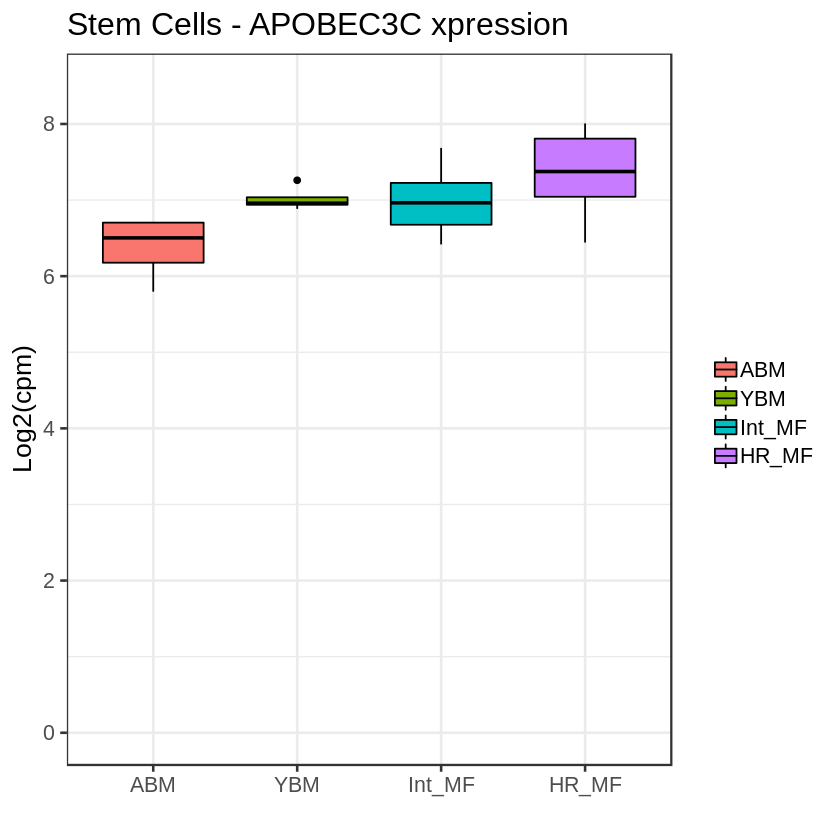

In [62]:
#pdf(file="MPN_Stem_Norm_MF_APOBEC3Cexpr_ggbox.pdf", width=7, height=7)
ggboxplot(lcpm.Stem.APOBEC3C.Norm.MF, #[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% c("ENST00000381298"),], 
          x="Risk2", y="APOBEC3C", ylim=c(0,8.5), #add="mean_se", 
          fill="Risk2") + 
    #stat_compare_means(method="t.test", label = "p.format", ref.group="NBM", label.y=15) + 
    theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Stem Cells - APOBEC3C xpression") +
    theme(legend.title=element_text(size=0)) + xlab("")
#dev.off()


## ADAR Isoform Expression Analysis
### ADAR transcripts are: "ENST00000368471", "ENST00000368474"

In [ ]:
ADAR.tx <- c("ENST00000368471", "ENST00000368474")
ADAR.tx.exp.Prog.filt <- DGE_all.Prog.filt$counts[rownames(DGE_all.Prog.filt$counts) %in% ADAR.tx,]
ADAR.tx.exp.Stem.filt <- DGE_all.Stem.filt$counts[rownames(DGE_all.Stem.filt$counts) %in% ADAR.tx,]
ADAR.tx.lcpm.Prog.filt <- lcpm2.Prog.filt[rownames(lcpm2.Prog.filt) %in% ADAR.tx,]
ADAR.tx.lcpm.Stem.filt <- lcpm2.Stem.filt[rownames(lcpm2.Stem.filt) %in% ADAR.tx,]
ADAR.tx.lcpm.Prog.all.filt <- lcpm2.Prog.all.filt[rownames(lcpm2.Prog.all.filt) %in% ADAR.tx,]
ADAR.tx.lcpm.Stem.all.filt <- lcpm2.Stem.all.filt[rownames(lcpm2.Stem.all.filt) %in% ADAR.tx,]
ADAR.tx.lcpm.exp <- list(Prog=ADAR.tx.lcpm.Prog.filt, Stem=ADAR.tx.lcpm.Stem.filt)
ADAR.tx.lcpm <- do.call(cbind, ADAR.tx.lcpm.exp)
ADAR.tx.all.lcpm <- do.call(cbind, list(Prog=ADAR.tx.lcpm.Prog.all.filt, Stem=ADAR.tx.lcpm.Stem.all.filt))
ADAR.tx.ratios <- apply(ADAR.tx.lcpm, 2, function(x) x[2] - x[1])
names(ADAR.tx.ratios) <- gsub("_S[0-9]+$", "", names(ADAR.tx.ratios))
    
ADAR.tx.lcpm.Prog.ratios <- apply(ADAR.tx.lcpm.Prog.filt, 2, function(x) x[2] - x[1])
names(ADAR.tx.lcpm.Prog.ratios) <- gsub("_S[0-9]+$", "", names(ADAR.tx.lcpm.Prog.ratios))
ADAR.tx.lcpm.Prog.ratios.df <- data.frame(Sample=names(ADAR.tx.lcpm.Prog.ratios), 
                                          value=ADAR.tx.lcpm.Prog.ratios,
                                          Phenotype=factor(as.character(meta.Prog.filt[match(names(ADAR.tx.lcpm.Prog.ratios), 
                                                                gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),"Sample.type3"]), 
                                                           levels=c("ABM", "YBM","PV","ET", "MF", "CML", "AML")))

ADAR.tx.lcpm.Stem.ratios <- apply(ADAR.tx.lcpm.Stem.filt, 2, function(x) x[2] - x[1])
names(ADAR.tx.lcpm.Stem.ratios) <- gsub("_S[0-9]+$", "", names(ADAR.tx.lcpm.Stem.ratios))
ADAR.tx.lcpm.Stem.ratios.df <- data.frame(Sample=names(ADAR.tx.lcpm.Stem.ratios), 
                                          value=ADAR.tx.lcpm.Stem.ratios,
                                          Phenotype=factor(as.character(meta.Stem.filt[match(names(ADAR.tx.lcpm.Stem.ratios), 
                                                                gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),"Sample.type3"]), 
                                                           levels=c("ABM", "YBM","PV","ET", "MF", "CML", "AML")))


In [41]:
lcpm.Prog.APOBEC3C$ADARp110.expr <- ADAR.tx.all.lcpm[1, match(gsub("_S[0-9]*$", "", lcpm.Prog.APOBEC3C$Sample), 
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Prog.APOBEC3C$ADARp150.expr <- ADAR.tx.all.lcpm[2, match(gsub("_S[0-9]*$", "", lcpm.Prog.APOBEC3C$Sample), 
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Prog.APOBEC3C$ADARratio <- lcpm.Prog.APOBEC3C$ADARp150.expr - lcpm.Prog.APOBEC3C$ADARp110.expr

lcpm.Stem.APOBEC3C$ADARp110.expr <- ADAR.tx.all.lcpm[1, match(gsub("_S[0-9]*$", "", lcpm.Stem.APOBEC3C$Sample), 
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Stem.APOBEC3C$ADARp150.expr <- ADAR.tx.all.lcpm[2, match(gsub("_S[0-9]*$", "", lcpm.Stem.APOBEC3C$Sample),
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Stem.APOBEC3C$ADARratio <- lcpm.Stem.APOBEC3C$ADARp150.expr - lcpm.Stem.APOBEC3C$ADARp110.expr

In [ ]:
head(lcpm.Prog.APOBEC3C.All)
colnames(ADAR.tx.lcpm.Prog.all.filt)
lcpm.Prog.APOBEC3C.All$Sample

In [42]:
lcpm.Prog.APOBEC3C.All$ADARp110.expr <- ADAR.tx.all.lcpm[1, match(gsub("_S[0-9]*$", "", lcpm.Prog.APOBEC3C.All$Sample), 
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Prog.APOBEC3C.All$ADARp150.expr <- ADAR.tx.all.lcpm[2, match(gsub("_S[0-9]*$", "", lcpm.Prog.APOBEC3C.All$Sample), 
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Prog.APOBEC3C.All$ADARratio <- lcpm.Prog.APOBEC3C.All$ADARp150.expr - lcpm.Prog.APOBEC3C.All$ADARp110.expr
#ADAR.tx.all.lcpm[match(lcpm.Prog.APOBEC3C$File_ID,ADAR.tx.all.lcpm$File_ID), "ADAR.p150"]
lcpm.Stem.APOBEC3C.All$ADARp110.expr <- ADAR.tx.all.lcpm[1, match(gsub("_S[0-9]*$", "", lcpm.Stem.APOBEC3C.All$Sample), 
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Stem.APOBEC3C.All$ADARp150.expr <- ADAR.tx.all.lcpm[2, match(gsub("_S[0-9]*$", "", lcpm.Stem.APOBEC3C.All$Sample),
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Stem.APOBEC3C.All$ADARratio <- lcpm.Stem.APOBEC3C.All$ADARp150.expr - lcpm.Stem.APOBEC3C.All$ADARp110.expr

lcpm.Prog.APOBEC3C.All$ADARp110.expr <- ifelse(lcpm.Prog.APOBEC3C.All$ADARp110.expr < -6, 0.01, 
                                           lcpm.Prog.APOBEC3C.All$ADARp110.expr)
lcpm.Prog.APOBEC3C.All$ADARratio <- lcpm.Prog.APOBEC3C.All$ADARp150.expr - lcpm.Prog.APOBEC3C.All$ADARp110.expr
lcpm.Prog.APOBEC3C.All$Cell.type <- gsub("^Progenitor$", "Progenitors", gsub("Sorted progenitors", "Progenitor", 
                                                                    as.character(lcpm.Prog.APOBEC3C.All$Cell.type)))
cor(lcpm.Prog.APOBEC3C.All$APOBEC3C[-c(10)],lcpm.Prog.APOBEC3C.All$ADARratio[-c(10)])

lcpm.Stem.APOBEC3C.All$ADARp110.expr <- ifelse(lcpm.Stem.APOBEC3C.All$ADARp110.expr < -6, 0.01, 
                                           lcpm.Stem.APOBEC3C.All$ADARp110.expr)
lcpm.Stem.APOBEC3C.All$ADARratio <- lcpm.Stem.APOBEC3C.All$ADARp150.expr - lcpm.Stem.APOBEC3C.All$ADARp110.expr
lcpm.Stem.APOBEC3C.All$Cell.type <- gsub("^Stem$", "Stem Cells", gsub("Sorted stem", "Stem", 
                                                                    as.character(lcpm.Stem.APOBEC3C.All$Cell.type)))
cor(lcpm.Stem.APOBEC3C.All$APOBEC3C[-c(10)],lcpm.Stem.APOBEC3C.All$ADARratio[-c(10)])
lcpm.APOBEC3C.All <- rbind(lcpm.Stem.APOBEC3C.All, lcpm.Prog.APOBEC3C.All)
lcpm.APOBEC3C.All$Cell.type <- factor(lcpm.APOBEC3C.All$Cell.type)
dim(lcpm.APOBEC3C.All)
head(lcpm.APOBEC3C.All)

[1] -0.7904422

[1] 0.1950289

[1] 103  21

File_ID,Sample,ID,Sample.type,Age,Condition,Cell.type,Patient_ID,Mutation,CellType,⋯,Sample.type3,Phenotype,Treatment_code2,Phenotype2,APOBEC3C,Risk2,Risk,ADARp110.expr,ADARp150.expr,ADARratio
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
27_8,X27_8,368-HSC,Aged normal bone marrow,Aged,Normal,Stem Cells,368,Normal,BM,⋯,ABM,ABM,Healthy Control,Aged Normal,6.702666,ABM,None,7.435095,7.324489,-0.11060569
26_2,X26_2,401-HSC,Aged normal bone marrow,Aged,Normal,Stem Cells,401,Normal,BM,⋯,ABM,ABM,Healthy Control,Aged Normal,6.303396,ABM,None,7.650103,6.540844,-1.10925812
26_1,X26_1,410-HSC,Aged normal bone marrow,Aged,Normal,Stem Cells,410,Normal,BM,⋯,ABM,ABM,Healthy Control,Aged Normal,5.796631,ABM,None,6.741031,-6.791212,-13.53224311
26_7,X26_7,439-HSC,Aged normal bone marrow,Aged,Normal,Stem Cells,439,Normal,BM,⋯,ABM,ABM,Healthy Control,Aged Normal,6.705703,ABM,None,7.336592,7.352678,0.01608601
X591.BM.Stem,X591.BM.Stem_S0,591.BM.Stem,AML,Aged,AML,Stem Cells,591,JAK2 V617F-,BM,⋯,AML,AML,other,AML,5.298314,sAML,None,1.355918,7.900635,6.54471740
X591.PB.Stem,X591.PB.Stem_S0,591.PB.Stem,AML,Aged,AML,Stem Cells,591,JAK2 V617F-,PB,⋯,AML,AML,other,AML,7.625252,sAML,None,5.709302,7.394732,1.68542990


## Figure 2D
### ADAR Isoform Ratio Barchart in Progenitor Cells

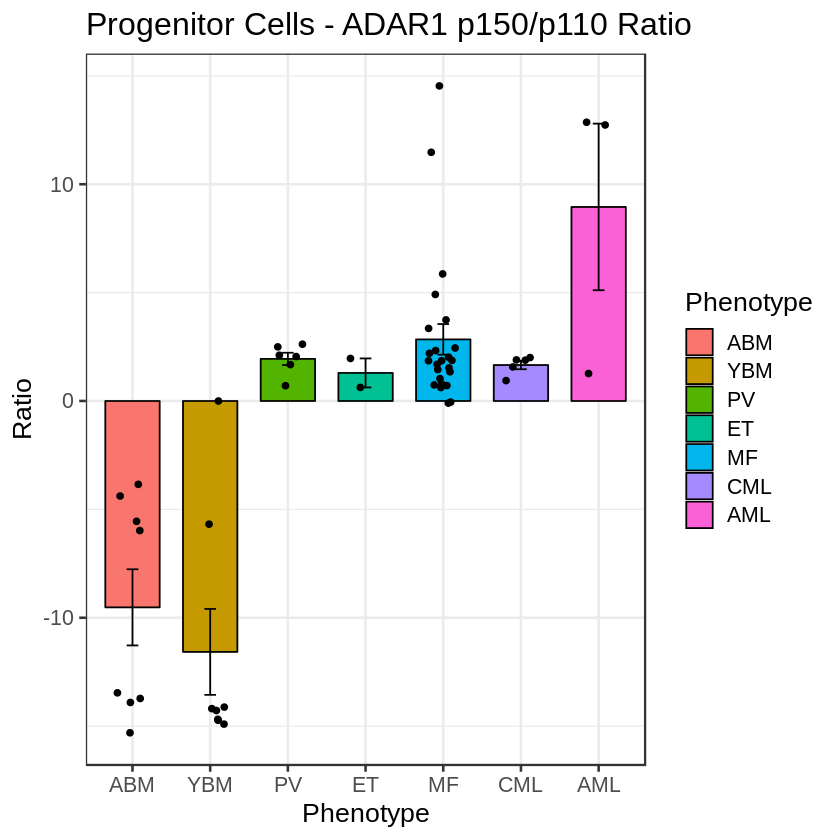

In [43]:
rownames(ADAR.tx.lcpm.Prog.filt) <- c("ADAR1-p110", "ADAR1-p150")

ADAR.tx.lcpm.Prog.ratios <- apply(ADAR.tx.lcpm.Prog.filt, 2, function(x) x[2] - x[1])
names(ADAR.tx.lcpm.Prog.ratios) <- gsub("_S[0-9]+$", "", names(ADAR.tx.lcpm.Prog.ratios))
ADAR.tx.lcpm.Prog.ratios.df <- data.frame(Sample=names(ADAR.tx.lcpm.Prog.ratios), 
                                          value=ADAR.tx.lcpm.Prog.ratios,
                                          Phenotype=factor(as.character(meta2.Prog.filt[match(names(ADAR.tx.lcpm.Prog.ratios), 
                                                                gsub("_S[0-9]+$","",meta2.Prog.filt$Sample)),"Sample.type3"]), 
                                                           levels=c("ABM", "YBM","PV","ET", "MF", "CML", "AML")))

#pdf(file="Holm_Jamieson_Prog_ADARisoformRatio_ABM_YBM_byPhenotype.pdf", width=7, height=7)
ggbarplot(ADAR.tx.lcpm.Prog.ratios.df, x="Phenotype", y="value", add=c("mean_se", "jitter"), fill="Phenotype") + 
    theme_bw(base_size=16) + ylab("Ratio") + labs(title="Progenitor Cells - ADAR1 p150/p110 Ratio")
#dev.off()
    

## Figure 2D
### ADAR Isoform Ratio Barchart in Hematopoietic Stem Cells

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

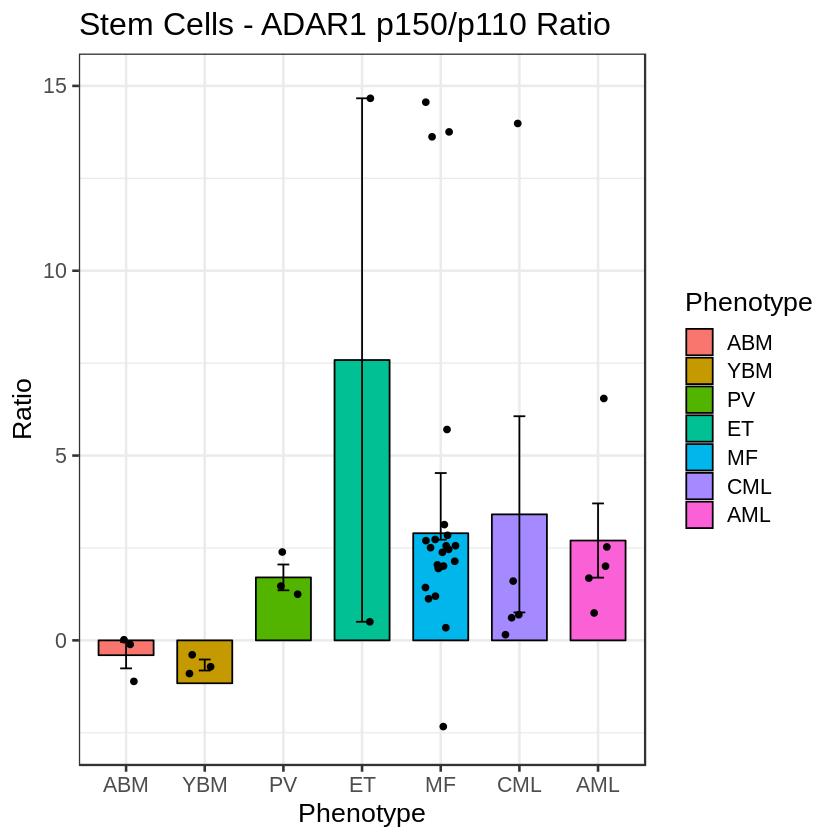

In [44]:
ADAR.tx.lcpm.Stem.ratios <- apply(ADAR.tx.lcpm.Stem.filt, 2, function(x) x[2] - x[1])
names(ADAR.tx.lcpm.Stem.ratios) <- gsub("_S[0-9]+$", "", names(ADAR.tx.lcpm.Stem.ratios))
ADAR.tx.lcpm.Stem.ratios.df <- data.frame(Sample=names(ADAR.tx.lcpm.Stem.ratios), 
                                          value=ADAR.tx.lcpm.Stem.ratios,
                                          Phenotype=factor(as.character(meta2.Stem.filt[match(names(ADAR.tx.lcpm.Stem.ratios), 
                                                                gsub("_S[0-9]+$","",meta2.Stem.filt$Sample)),"Sample.type3"]), 
                                                           levels=c("ABM", "YBM", "PV","ET", "MF", "CML", "AML")))
ADAR.tx.lcpm.Stem.ratios.df <- ADAR.tx.lcpm.Stem.ratios.df[!is.na(ADAR.tx.lcpm.Stem.ratios.df$Phenotype),][-3,]

#pdf(file="Holm_Jamieson_Stem_ADARisoformRatio_ABM_YBM_byPhenotype.pdf", width=7, height=7)
ggbarplot(ADAR.tx.lcpm.Stem.ratios.df, x="Phenotype", y="value", add=c("mean_se", "jitter"), fill="Phenotype") + 
    theme_bw(base_size=16) + ylab("Ratio") + labs(title="Stem Cells - ADAR1 p150/p110 Ratio") + ylim(-2.5,15)
#dev.off()
    

## Figure 2F
### Correlation of ADAR p150 Expression and APOBEC3C in MF Sample for both Progenitor and Stem Cells

Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.
Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.


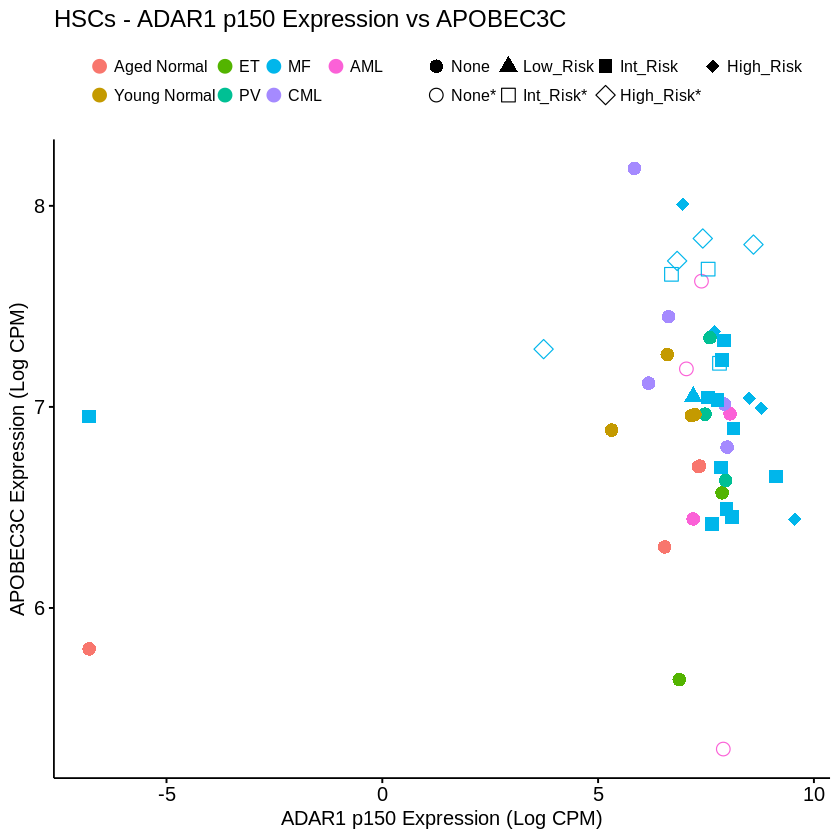

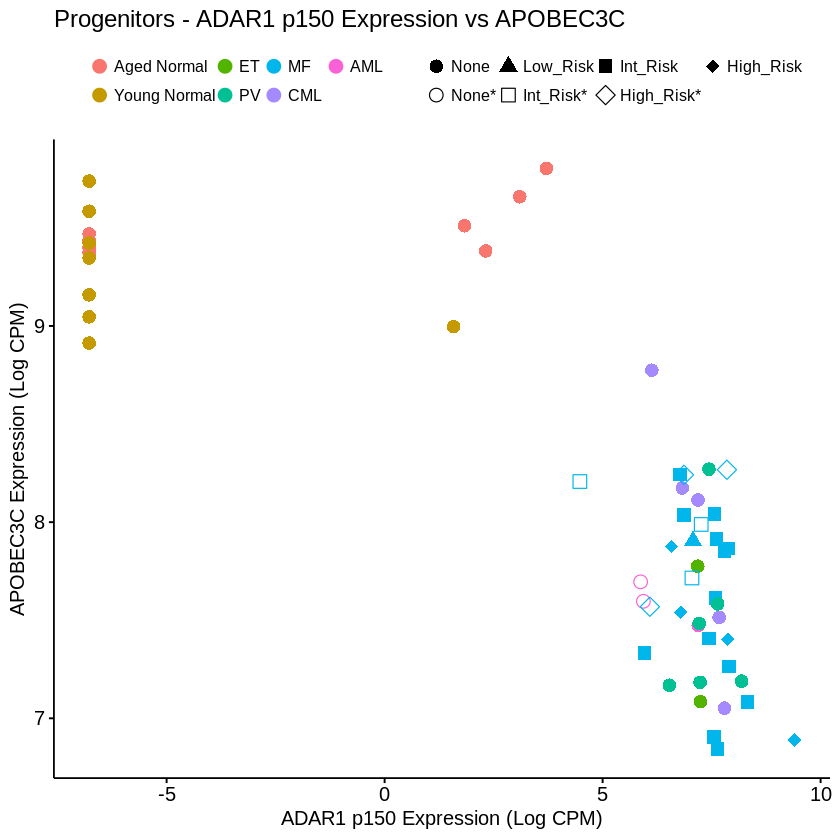

In [45]:
lcpm.Stem.APOBEC3C.All$Status <- rep("",nrow(lcpm.Stem.APOBEC3C.All))
lcpm.Stem.APOBEC3C.All$Status[lcpm.Stem.APOBEC3C.All$Patient_ID %in% c("591", "560", "566", "567", "573","576",
                                                                       "666", "599", "735", "672")] <- "*"
lcpm.Stem.APOBEC3C.All$RiskStatus <- factor(paste0(as.character(lcpm.Stem.APOBEC3C.All$Risk),
                                                  lcpm.Stem.APOBEC3C.All$Status), 
                                            levels=c('None', 'None*', 'Low_Risk', 'Low_Risk*', 'Int_Risk*',
                                                     'Int_Risk','High_Risk*', 'High_Risk'))
lcpm.Stem.APOBEC3C.All$RiskStatusSize <- as.numeric(lcpm.Stem.APOBEC3C.All$RiskStatus)
lcpm.Stem.APOBEC3C.All$RiskStatusSize[lcpm.Stem.APOBEC3C.All$RiskStatusSize != 8] <- 3.5
lcpm.Stem.APOBEC3C.All$RiskStatusSize[lcpm.Stem.APOBEC3C.All$RiskStatusSize == 8] <- 5

#png(file="MPN_HSC_APOBEC3Cexpr_vs_ADARp150expr_ggScatter_shapeRisk_withSurvival2.png", width=7, height=7, , units = 'in', res = 300)
ggscatter(lcpm.Stem.APOBEC3C.All,
          x="ADARp150.expr", y="APOBEC3C", color="Phenotype2", shape = "RiskStatus", #label="Status", 
          font.label=c(16,"plain"),
          title = "HSCs - ADAR1 p150 Expression vs APOBEC3C",size=3.5#, size="RiskStatusSize"
         ) +
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          #stat_cor(output.type = "text", label.x = -4, na.rm=TRUE) + 
          scale_shape_manual(values=c(16,1,17,0,15,5,18)) + #scale_fill_manual(values=c(0,0.99)) +
          scale_size_manual(values=c(4,4,4,4,4,4,7)) + 
          ylab("APOBEC3C Expression (Log CPM)") + xlab("ADAR1 p150 Expression (Log CPM)") + 
          theme(legend.title=element_text(size=0))
          #stat_smooth(method="lm", se=FALSE, col="black") 
          #guides(colour = guide_legend(override.aes = list(size=4)))
#dev.off()

lcpm.Prog.APOBEC3C.All$Status <- rep("",nrow(lcpm.Prog.APOBEC3C.All))
lcpm.Prog.APOBEC3C.All$Status[lcpm.Prog.APOBEC3C.All$Patient_ID %in% c("591", "560", "566", "567", "573","576",
                                                                       "666", "599", "735", "672")] <- "*"
lcpm.Prog.APOBEC3C.All$RiskStatus <- factor(paste0(as.character(lcpm.Prog.APOBEC3C.All$Risk), 
                                                  lcpm.Prog.APOBEC3C.All$Status), 
                                            levels=c('None', 'None*', 'Low_Risk', 'Low_Risk*', 'Int_Risk*',
                                                     'Int_Risk','High_Risk*', 'High_Risk'))

#png(file="MPN_Prog_APOBEC3Cexpr_vs_ADARp150expr_ggScatter_shapeRisk_withSurvival2.png", width=7, height=7, , units = 'in', res = 300)
ggscatter(lcpm.Prog.APOBEC3C.All,
          x="ADARp150.expr", y="APOBEC3C", color = "Phenotype2", shape="RiskStatus", #label="Status", 
          font.label=c(16,"plain"),
          title = "Progenitors - ADAR1 p150 Expression vs APOBEC3C", size=3.5) +
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          #stat_cor(output.type = "text", label.x = -4, na.rm=TRUE) + 
          scale_shape_manual(values=c(16,1,17,0,15,5,18)) + 
          ylab("APOBEC3C Expression (Log CPM)") + xlab("ADAR1 p150 Expression (Log CPM)") + 
          theme(legend.title=element_text(size=0))
          #stat_smooth(method="lm", se=FALSE, col="black") 
          #guides(colour = guide_legend(override.aes = list(size=4)))
#dev.off()

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”Warning message:
“Ignoring unknown aesthetics: shape”Warning message:
“Computation failed in `stat_cor()`:
Evaluation error: `as_dictionary()` is defunct as of rlang 0.3.0.
Please use `as_data_pronoun()` instead.”

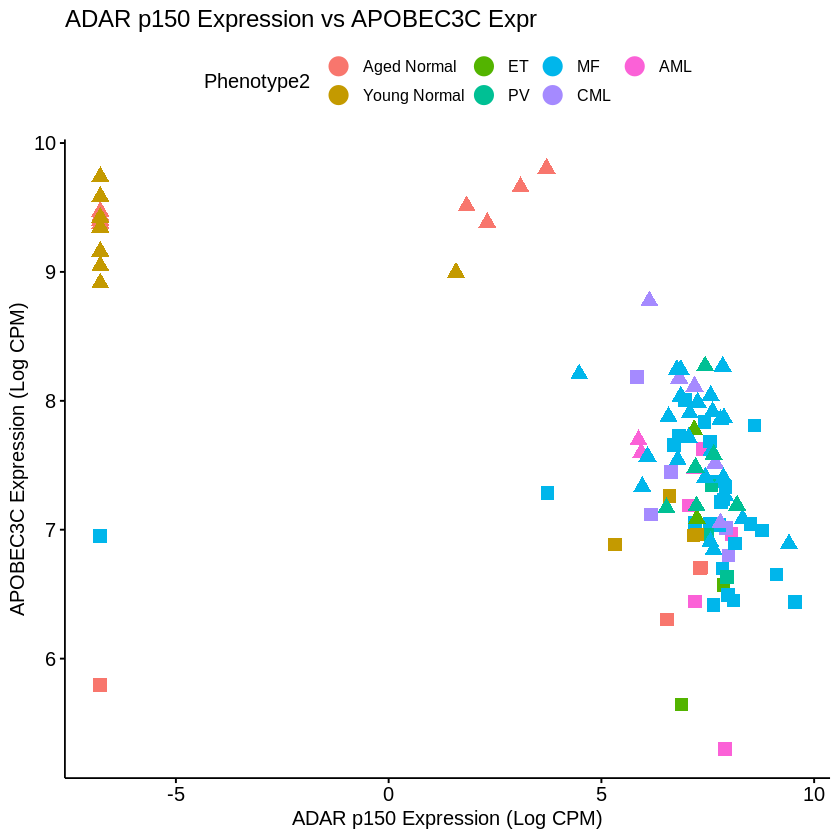

In [46]:
#png("MPN_Sample_APOBEC3Cexpr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
ggscatter(lcpm.APOBEC3C.All, x="ADARp150.expr", y="APOBEC3C", color="Phenotype2", 
          size=c(3.5,3.5)[lcpm.APOBEC3C.All$Cell.type],
          shape = c(17,15)[lcpm.APOBEC3C.All$Cell.type],
          title = "ADAR p150 Expression vs APOBEC3C Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("APOBEC3C Expression (Log CPM)") + xlab("ADAR p150 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

### Process Expression of STAT3 and STAT5B Isoforms in MPN Dataset

In [31]:
ENST2EG2SYM <- toTable(org.Hs.egENSEMBLTRANS2EG)
ENST2EG2SYM$SYM <- ENS2EG2SYM[match(ENST2EG2SYM$gene_id, ENS2EG2SYM$gene_id),"SYM"]
head(ENST2EG2SYM)
table(ENST2EG2SYM$gene_id %in% "6774")

gene_id,trans_id,SYM
<chr>,<chr>,<fct>
3,ENST00000543404,A2MP1
3,ENST00000566278,A2MP1
3,ENST00000545343,A2MP1
3,ENST00000544183,A2MP1
10,ENST00000286479,NAT2
10,ENST00000520116,NAT2



FALSE 
38035 

In [32]:
STAT3.ENST <- ENST2EG2SYM[ENST2EG2SYM$gene_id %in% "6774",]
head(STAT3.ENST)
head(rownames(DGE_all.Prog.filt$counts))
STAT3.tx <- c("ENST00000264657", "ENST00000585517", "ENST00000588969", "ENST00000404395", "ENST00000389272",
"ENST00000588065", "ENST00000590776", "ENST00000462286", "ENST00000471989", "ENST00000491272", 
"ENST00000462269", "ENST00000498330", "ENST00000585360", "ENST00000478276")

STAT3.tx.exp.Prog.filt <- DGE_all.Prog.filt$counts[rownames(DGE_all.Prog.filt$counts) %in% STAT3.tx,]
STAT3.tx.exp.Stem.filt <- DGE_all.Stem.filt$counts[rownames(DGE_all.Stem.filt$counts) %in% STAT3.tx,]
dim(STAT3.tx.exp.Prog.filt)
rownames(STAT3.tx.exp.Prog.filt)
dim(STAT3.tx.exp.Stem.filt)
rownames(STAT3.tx.exp.Stem.filt)





gene_id,trans_id,SYM
<chr>,<chr>,<fct>


[1] "ENST00000373020" "ENST00000371582" "ENST00000371584" "ENST00000371588"
[5] "ENST00000367770" "ENST00000367771"

[1]  8 56

[1] "ENST00000264657" "ENST00000389272" "ENST00000404395" "ENST00000462269"
[5] "ENST00000462286" "ENST00000585517" "ENST00000588969" "ENST00000590776"

[1]  7 47

[1] "ENST00000264657" "ENST00000389272" "ENST00000404395" "ENST00000462286"
[5] "ENST00000585517" "ENST00000588969" "ENST00000590776"

In [37]:
STAT3.tx.lcpm.Prog <- lcpm2.Prog.all.filt[rownames(lcpm2.Prog.all.filt) %in% STAT3.tx,]

STAT3.lcpm.Prog.filt <- STAT3.tx.lcpm.Prog
STAT3.lcpm.Prog.filt.pheno <- cbind(Gene=rownames(STAT3.lcpm.Prog.filt), STAT3.lcpm.Prog.filt)

STAT3.lcpm.Prog.filt.pheno.melt <- melt(STAT3.lcpm.Prog.filt.pheno[,-1])
STAT3.lcpm.Prog.filt.pheno.melt$Phenotype <- meta.Prog.filt[match(gsub("_S[0-9]+$","",STAT3.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),"Sample.type2"]
STAT3.lcpm.Prog.filt.pheno.melt <- STAT3.lcpm.Prog.filt.pheno.melt[!is.na(STAT3.lcpm.Prog.filt.pheno.melt$Phenotype),]
STAT3.lcpm.Prog.filt.pheno.melt$Phenotype <- factor(as.character(STAT3.lcpm.Prog.filt.pheno.melt$Phenotype), 
                                              levels=c("NBM", "PV","ET", "MF", "CML", "AML"))

colnames(STAT3.lcpm.Prog.filt.pheno.melt)[1] <- "Gene" 
STAT3.lcpm.Prog.filt.pheno.melt <- STAT3.lcpm.Prog.filt.pheno.melt[!is.na(STAT3.lcpm.Prog.filt.pheno.melt$Gene),]
STAT3.lcpm.Prog.filt.pheno.melt$value <- as.numeric(as.character(STAT3.lcpm.Prog.filt.pheno.melt$value))

STAT3.lcpm.Prog.filt.pheno.melt$Phenotype2 <- meta.Prog.filt[match(gsub("_S[0-9]+$","",STAT3.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),"Sample.type3"]
STAT3.lcpm.Prog.filt.pheno.melt$Phenotype2 <- factor(as.character(STAT3.lcpm.Prog.filt.pheno.melt$Phenotype2), 
                                              levels=c("ABM", "YBM", "PV","ET", "MF", "CML", "AML"))
STAT3.lcpm.Prog.filt.pheno.melt$Patient_ID <- meta.Prog.filt[match(gsub("_S[0-9]+$","",STAT3.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),"Patient_ID"]



In [38]:
STAT3.tx.lcpm.Stem <- lcpm2.Stem.all.filt[rownames(lcpm2.Stem.all.filt) %in% STAT3.tx,]

STAT3.lcpm.Stem.filt <- STAT3.tx.lcpm.Stem
STAT3.lcpm.Stem.filt.pheno <- cbind(Gene=rownames(STAT3.lcpm.Stem.filt), STAT3.lcpm.Stem.filt)
STAT3.lcpm.Stem.filt.pheno.melt <- melt(STAT3.lcpm.Stem.filt.pheno[,-1])
STAT3.lcpm.Stem.filt.pheno.melt$Phenotype <- meta.Stem.filt[match(gsub("_S[0-9]+$","",STAT3.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),"Sample.type2"]

STAT3.lcpm.Stem.filt.pheno.melt <- STAT3.lcpm.Stem.filt.pheno.melt[!is.na(STAT3.lcpm.Stem.filt.pheno.melt$Phenotype),]

STAT3.lcpm.Stem.filt.pheno.melt$Phenotype <- factor(as.character(STAT3.lcpm.Stem.filt.pheno.melt$Phenotype), 
                                              levels=c("NBM", "PV","ET", "MF", "CML", "AML"))

colnames(STAT3.lcpm.Stem.filt.pheno.melt)[1] <- "Gene" 
STAT3.lcpm.Stem.filt.pheno.melt <- STAT3.lcpm.Stem.filt.pheno.melt[!is.na(STAT3.lcpm.Stem.filt.pheno.melt$Gene),]
STAT3.lcpm.Stem.filt.pheno.melt$value <- as.numeric(as.character(STAT3.lcpm.Stem.filt.pheno.melt$value))

STAT3.lcpm.Stem.filt.pheno.melt$Phenotype2 <- meta.Stem.filt[match(gsub("_S[0-9]+$","",STAT3.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),"Sample.type3"]
STAT3.lcpm.Stem.filt.pheno.melt$Phenotype2 <- factor(as.character(STAT3.lcpm.Stem.filt.pheno.melt$Phenotype2), 
                                              levels=c("ABM", "YBM", "PV","ET", "MF", "CML", "AML"))
STAT3.lcpm.Stem.filt.pheno.melt$Patient_ID <- meta.Stem.filt[match(gsub("_S[0-9]+$","",STAT3.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),"Patient_ID"]


In [39]:
STAT3alphabeta.tx <- c("ENST00000264657", "ENST00000585517")
STAT3ab.tx.lcpm.Prog <- lcpm2.Prog.all.filt[rownames(lcpm2.Prog.all.filt) %in% STAT3alphabeta.tx,]

STAT3ab.lcpm.Prog.filt <- STAT3ab.tx.lcpm.Prog
STAT3ab.lcpm.Prog.filt.pheno <- cbind(Gene=rownames(STAT3ab.lcpm.Prog.filt), STAT3ab.lcpm.Prog.filt)

STAT3ab.lcpm.Prog.filt.pheno.melt <- melt(STAT3ab.lcpm.Prog.filt.pheno[,-1])
STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype <- meta.Prog.filt[match(gsub("_S[0-9]+$","",STAT3ab.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),"Sample.type2"]
STAT3ab.lcpm.Prog.filt.pheno.melt <- STAT3ab.lcpm.Prog.filt.pheno.melt[!is.na(STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype),]
STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype <- factor(as.character(STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype), 
                                              levels=c("NBM", "PV","ET", "MF", "CML", "AML"))

colnames(STAT3ab.lcpm.Prog.filt.pheno.melt)[1] <- "Gene" 
STAT3ab.lcpm.Prog.filt.pheno.melt <- STAT3ab.lcpm.Prog.filt.pheno.melt[!is.na(STAT3ab.lcpm.Prog.filt.pheno.melt$Gene),]
STAT3ab.lcpm.Prog.filt.pheno.melt$value <- as.numeric(as.character(STAT3ab.lcpm.Prog.filt.pheno.melt$value))
STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype2 <- meta.Prog.filt[match(gsub("_S[0-9]+$","",STAT3ab.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),"Sample.type3"]
STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype2 <- factor(as.character(STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype2), 
                                              levels=c("ABM", "YBM", "PV","ET", "MF", "CML", "AML"))
STAT3ab.lcpm.Prog.filt.pheno.melt$Patient_ID <- meta.Prog.filt[match(gsub("_S[0-9]+$","",STAT3ab.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),"Patient_ID"]

STAT3ab.tx.lcpm.Stem <- lcpm2.Stem.all.filt[rownames(lcpm2.Stem.all.filt) %in% STAT3alphabeta.tx,]

STAT3ab.lcpm.Stem.filt <- STAT3ab.tx.lcpm.Stem
STAT3ab.lcpm.Stem.filt.pheno <- cbind(Gene=rownames(STAT3ab.lcpm.Stem.filt), STAT3ab.lcpm.Stem.filt)
STAT3ab.lcpm.Stem.filt.pheno.melt <- melt(STAT3ab.lcpm.Stem.filt.pheno[,-1])
STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype <- meta.Stem.filt[match(gsub("_S[0-9]+$","",STAT3ab.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),"Sample.type2"]

STAT3ab.lcpm.Stem.filt.pheno.melt <- STAT3ab.lcpm.Stem.filt.pheno.melt[!is.na(STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype),]

STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype <- factor(as.character(STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype), 
                                              levels=c("NBM", "PV","ET", "MF", "CML", "AML"))

colnames(STAT3ab.lcpm.Stem.filt.pheno.melt)[1] <- "Gene" 
STAT3ab.lcpm.Stem.filt.pheno.melt <- STAT3ab.lcpm.Stem.filt.pheno.melt[!is.na(STAT3ab.lcpm.Stem.filt.pheno.melt$Gene),]
STAT3ab.lcpm.Stem.filt.pheno.melt$value <- as.numeric(as.character(STAT3ab.lcpm.Stem.filt.pheno.melt$value))
STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype2 <- meta.Stem.filt[match(gsub("_S[0-9]+$","",STAT3ab.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),"Sample.type3"]
STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype2 <- factor(as.character(STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype2), 
                                              levels=c("ABM", "YBM", "PV","ET", "MF", "CML", "AML"))
STAT3ab.lcpm.Stem.filt.pheno.melt$Patient_ID <- meta.Stem.filt[match(gsub("_S[0-9]+$","",STAT3ab.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),"Patient_ID"]

In [42]:
STAT3ab.tx.lcpm.exp <- list(Prog=STAT3ab.lcpm.Prog.filt, Stem=STAT3ab.lcpm.Stem.filt)
dim(STAT3ab.tx.lcpm.exp)
head(STAT3ab.tx.lcpm.exp)
save(STAT3ab.tx.lcpm.exp, file="STAT3ab.tx.lcpm.exp.rdata")

NULL

,X368_ACAGTG_S0,X380_ACAGTG_S0,X401_ACAGTG_S0,X402_ACAGTG_S0,X410_ACAGTG_S0,X415_ACAGTG_S0,X416_ACAGTG_S0,X426_ACAGTG_S0,X591.BM.Prog_S0,X672B.PB.Prog_S0,⋯,X107,X48_MDStoAML,X4018_GTGAAA_S0,X4040_GTGAAA_S0,X4066_GTGAAA_S0,X4188_GTGAAA_S0,X4215_GTGAAA_S0,X4218_GTGAAA_S0,X4259_GTGAAA_S0,X4279_GTGAAA_S0
ENST00000264657,6.738469,6.804119,7.330105,6.906366,7.302064,7.699087,6.995781,7.166127,7.199055,6.872521,⋯,8.013893,7.870594,6.880429,6.851723,6.4675670,6.653613,7.111272,7.065819,6.982675,6.662725
ENST00000585517,2.441963,1.606758,2.729316,2.038446,1.883874,2.595755,1.448950,1.589434,6.773075,5.779347,⋯,3.152042,1.883385,1.726021,2.290361,0.3733738,1.992810,1.024065,1.741582,2.593206,1.555510
,X27_8,X26_2,X26_1,X26_7,X591.BM.Stem_S0,X591.PB.Stem_S0,X672A.PB.Stem_S5,X672B.PB.Stem_S8,X735.PB.Stem_S7,X571.BM.Stem_S0,⋯,X736.BM.Stem_S0,X744.PB.Stem_S0,X767.BM.Stem_S0,X562.PB.Stem_S0,X598.PB.Stem_S12,X689.BM.Stem_S0,X26_3,X26_4,X26_5,X26_6
ENST00000264657,7.643010,7.449019,6.877377,7.363691,8.293138,7.269941,7.387903,7.419285,6.484864,6.949442,⋯,7.136609,7.367350,6.723311,7.069459,6.998524,7.339278,7.210098,7.713111,7.626894,7.388897
ENST00000585517,3.439895,3.589906,-6.791212,2.602897,7.597361,6.822142,7.036685,6.803842,5.579863,5.484289,⋯,6.450357,6.423555,5.798525,5.608286,6.987916,6.484461,3.414591,3.266373,2.487564,1.577983


## Figure S5A
### STAT3 alpha Isoform Expression Boxplot in Normal and MPNs for both Progenitor and HS Cells

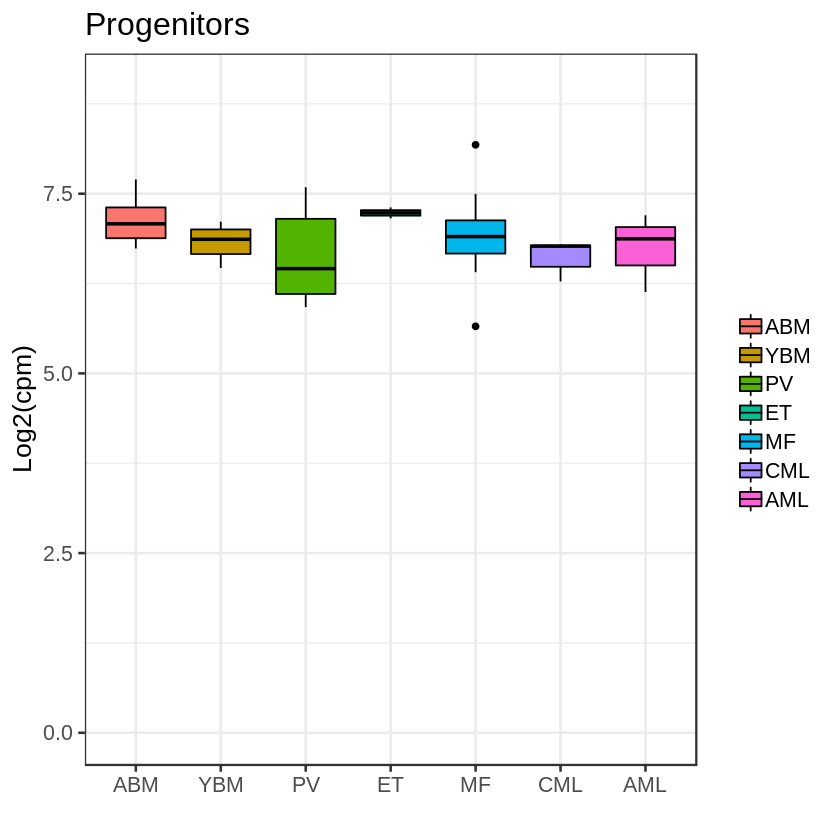

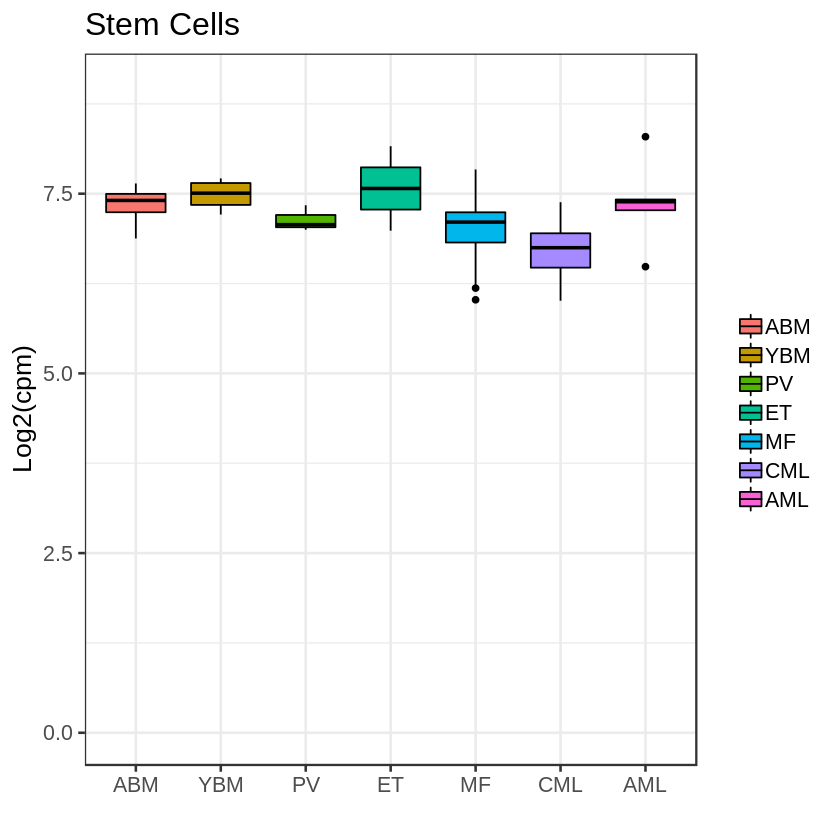

In [55]:
STAT3a.lcpm.Prog.filt.pheno.melt <- subset(STAT3ab.lcpm.Prog.filt.pheno.melt, Gene=="ENST00000264657")
STAT3a.lcpm.Stem.filt.pheno.melt <- subset(STAT3ab.lcpm.Stem.filt.pheno.melt, Gene=="ENST00000264657")

#pdf(file="Holm_Jamieson_Prog_STAT3alphaisoform_exprDistributionBoxplot_byPhenotype.pdf", width=7, height=7)
#png(file="Holm_Jamieson_Prog_STAT3alphaisoform_exprDistributionBoxplot_byPhenotype.png", width=7, height=7, units = 'in', res = 300)
ggboxplot(STAT3a.lcpm.Prog.filt.pheno.melt, #[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% c("ENST00000381298"),], 
          x="Phenotype2", y="value", #ylim=c(-1,8), #add="mean_se", 
          fill="Phenotype2") + ylim(c(0,9)) + xlab("") +
          #stat_compare_means(method="t.test", label = "p.signif", ref.group="ABM", label.y=8.8) + 
          theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Progenitors") +
          theme(legend.title=element_text(size=0))
#dev.off()

#pdf(file="Holm_Jamieson_Stem_STAT3alphaisoform_exprDistributionBoxplot_byPhenotype.pdf", width=7, height=7)
#png(file="Holm_Jamieson_Stem_STAT3alphaisoform_exprDistributionBoxplot_byPhenotype.png", width=7, height=7, , units = 'in', res = 300)
ggboxplot(STAT3a.lcpm.Stem.filt.pheno.melt, #[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% c("ENST00000381298"),], 
          x="Phenotype2", y="value", #ylim=c(-1,8), #add="mean_se", 
          fill="Phenotype2") + ylim(c(0,9)) + xlab("") +
          #stat_compare_means(method="t.test", label = "p.signif", ref.group="ABM", label.y=8.8) + 
          theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Stem Cells") +
          theme(legend.title=element_text(size=0)) 
#dev.off()

## Figure 5C
### STAT3 beta Isoform Expression Boxplot in Normal and MPNs for both Progenitor and HS Cells

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”

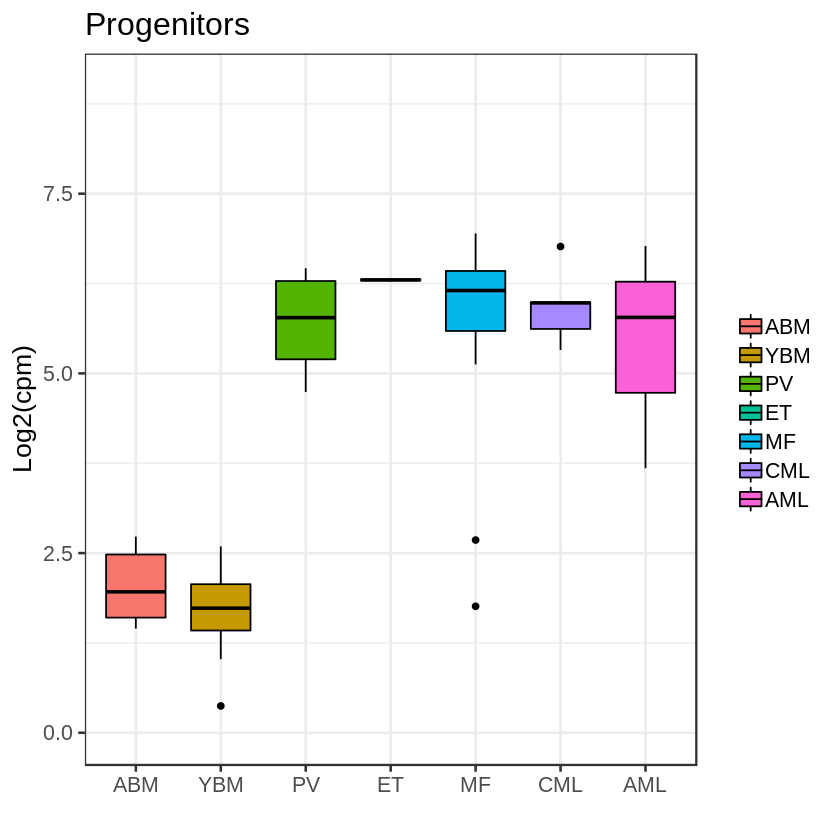

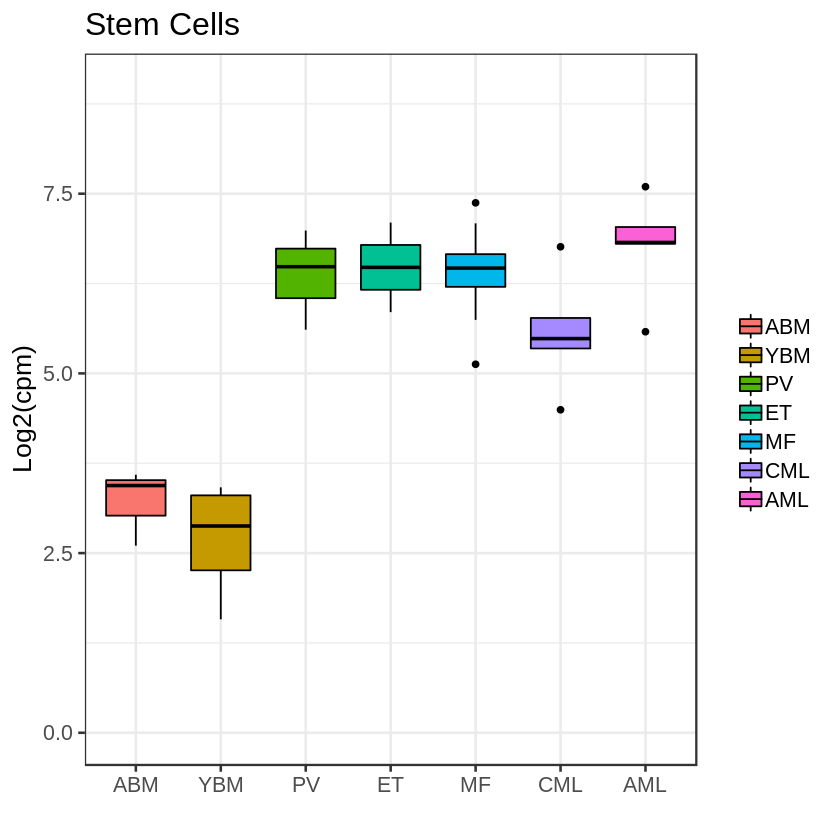

In [56]:
STAT3b.lcpm.Prog.filt.pheno.melt <- subset(STAT3ab.lcpm.Prog.filt.pheno.melt, Gene=="ENST00000585517")
STAT3b.lcpm.Stem.filt.pheno.melt <- subset(STAT3ab.lcpm.Stem.filt.pheno.melt, Gene=="ENST00000585517")

#pdf(file="Holm_Jamieson_Prog_STAT3alphaisoform_exprDistributionBoxplot_byPhenotype.pdf", width=7, height=7)
#png(file="Holm_Jamieson_Prog_STAT3betaisoform_exprDistributionBoxplot_byPhenotype.png", width=7, height=7, units = 'in', res = 300)
ggboxplot(STAT3b.lcpm.Prog.filt.pheno.melt, #[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% c("ENST00000381298"),], 
          x="Phenotype2", y="value", #ylim=c(-1,8), #add="mean_se", 
          fill="Phenotype2") + ylim(c(0,9)) + xlab("") +
          #stat_compare_means(method="t.test", label = "p.signif", ref.group="ABM", label.y=8.8) + 
          theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Progenitors") +
          theme(legend.title=element_text(size=0))
#dev.off()

#pdf(file="Holm_Jamieson_Stem_STAT3alphaisoform_exprDistributionBoxplot_byPhenotype.pdf", width=7, height=7)
#png(file="Holm_Jamieson_Stem_STAT3betaisoform_exprDistributionBoxplot_byPhenotype.png", width=7, height=7, , units = 'in', res = 300)
ggboxplot(STAT3b.lcpm.Stem.filt.pheno.melt, #[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% c("ENST00000381298"),], 
          x="Phenotype2", y="value", #ylim=c(-1,8), #add="mean_se", 
          fill="Phenotype2") + ylim(c(0,9)) + xlab("") +
          #stat_compare_means(method="t.test", label = "p.signif", ref.group="ABM", label.y=8.8) + 
          theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Stem Cells") +
          theme(legend.title=element_text(size=0)) + theme()
#dev.off()

## Figure 5D
### Plot Correlation of ADAR p150 Expression and STAT3/STAT5B in MF Samples for Progenitors

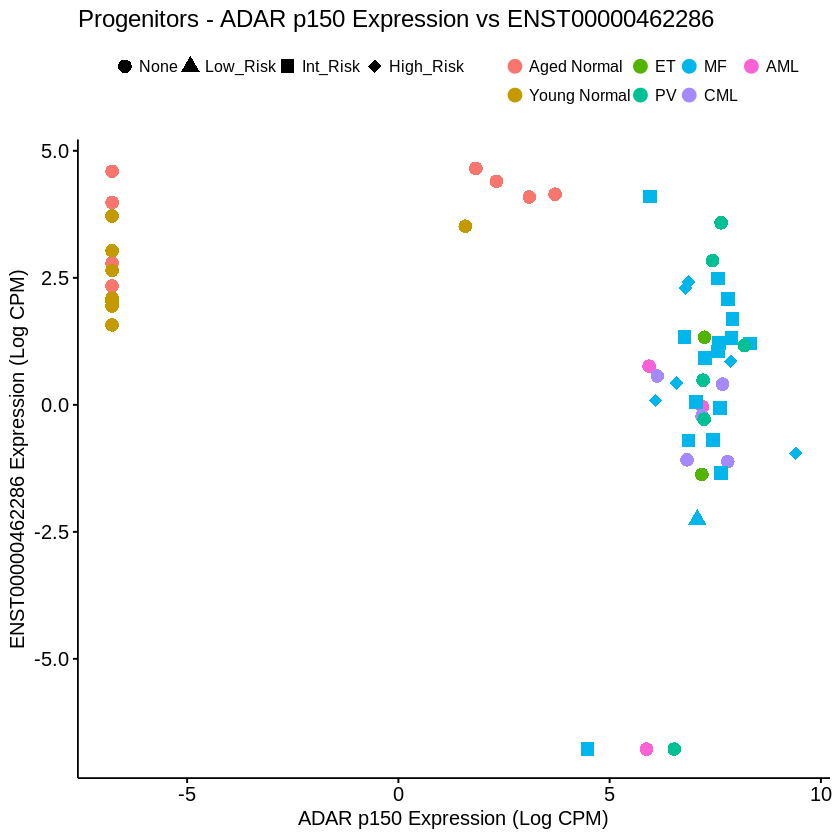

In [60]:
g <- rownames(STAT3.tx.exp.Prog.filt)[5]
lcpm.Prog.tmp <- STAT3.lcpm.Prog.filt.pheno.melt[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% g,]
colnames(lcpm.Prog.tmp)[2] <- "Sample"
lcpm.Prog.tmp$Phenotype2 <- as.character(lcpm.Prog.tmp$Phenotype2)
lcpm.Prog.tmp$Phenotype2[which(lcpm.Prog.tmp$Phenotype2 %in% c("ABM"))] <- "Aged Normal" 
lcpm.Prog.tmp$Phenotype2[which(lcpm.Prog.tmp$Phenotype2 %in% c("YBM"))] <- "Young Normal" 
lcpm.Prog.tmp$Phenotype2 <- factor(lcpm.Prog.tmp$Phenotype2, 
                                   levels=c("Aged Normal", "Young Normal", "ET", "PV", "MF", "CML", "AML")) 
lcpm.Prog.tmp$Risk <- "None"
lcpm.Prog.tmp$Risk[lcpm.Prog.tmp$Phenotype2 %in% "MF"] <- risk.meta.Prog[
    match(lcpm.Prog.tmp$Patient_ID[lcpm.Prog.tmp$Phenotype2 %in% "MF"], 
          risk.meta.Prog$Tumor_Sample_Barcode),"Condition"]
lcpm.Prog.tmp$Risk <- factor(lcpm.Prog.tmp$Risk, 
                             levels=c("None", "Low_Risk", "Int_Risk", "High_Risk"))
lcpm.Prog.tmp$ADARp110.expr <- ADAR.tx.all.lcpm[1, match(gsub("_S[0-9]*$", "", lcpm.Prog.tmp$Sample), 
                                                         gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Prog.tmp$ADARp150.expr <- ADAR.tx.all.lcpm[2, match(gsub("_S[0-9]*$", "", lcpm.Prog.tmp$Sample), 
                                                         gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Prog.tmp$ADARratio <- lcpm.Prog.tmp$ADARp150.expr - lcpm.Prog.tmp$ADARp110.expr

    #name2 <- paste0("MPN_Prog_Sample_STAT3_", g, "_vs_ADARp150expr_ggScatter_shapeRisk.png")
q <- ggscatter(lcpm.Prog.tmp,
          x="ADARp150.expr", y="value", color = "Phenotype2", shape="Risk", 
          title = title, size=3.5) +
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          scale_shape_manual(values=c(16,17,15,18)) + 
          ylab(paste0(g, " Expression (Log CPM)")) + xlab("ADAR p150 Expression (Log CPM)") + 
          theme(legend.title=element_text(size=0))
          #stat_smooth(method="lm", se=FALSE, col="black") 
          #guides(colour = guide_legend(override.aes = list(size=4)))
#png(file=name2, width=7, height=7, , units = 'in', res = 300)
print(q)
#dev.off()

## Figure S5B
### Plot Correlation of ADAR p150 Expression and STAT3/STAT5B in MF Samples for HS Cells

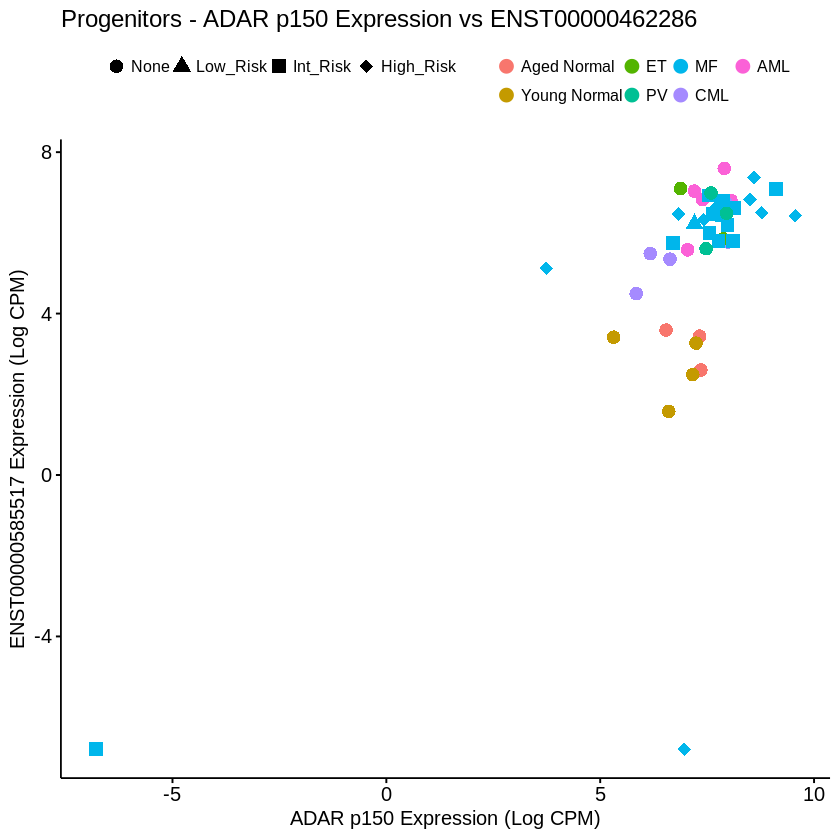

In [61]:
g <- rownames(STAT3.tx.exp.Stem.filt)[5]
lcpm.Stem.tmp <- STAT3.lcpm.Stem.filt.pheno.melt[STAT3.lcpm.Stem.filt.pheno.melt$Gene %in% g,]
colnames(lcpm.Stem.tmp)[2] <- "Sample"
lcpm.Stem.tmp$Phenotype2 <- as.character(lcpm.Stem.tmp$Phenotype2)
lcpm.Stem.tmp$Phenotype2[which(lcpm.Stem.tmp$Phenotype2 %in% c("ABM"))] <- "Aged Normal"
lcpm.Stem.tmp$Phenotype2[which(lcpm.Stem.tmp$Phenotype2 %in% c("YBM"))] <- "Young Normal"
lcpm.Stem.tmp$Phenotype2 <- factor(lcpm.Stem.tmp$Phenotype2, 
                                   levels=c("Aged Normal", "Young Normal", "ET", "PV", "MF", "CML", "AML"))
lcpm.Stem.tmp$Risk <- "None"
lcpm.Stem.tmp$Risk[lcpm.Stem.tmp$Phenotype2 %in% "MF"] <- risk.meta.Stem[
    match(lcpm.Stem.tmp$Patient_ID[lcpm.Stem.tmp$Phenotype2 %in% "MF"], 
          risk.meta.Stem$Tumor_Sample_Barcode),"Condition"]
lcpm.Stem.tmp$Risk <- factor(lcpm.Stem.tmp$Risk, 
                             levels=c("None", "Low_Risk", "Int_Risk", "High_Risk"))

lcpm.Stem.tmp$ADARp110.expr <- ADAR.tx.all.lcpm[1, match(gsub("_S[0-9]*$", "", lcpm.Stem.tmp$Sample), 
                                                         gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Stem.tmp$ADARp150.expr <- ADAR.tx.all.lcpm[2, match(gsub("_S[0-9]*$", "", lcpm.Stem.tmp$Sample),
                                                         gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Stem.tmp$ADARratio <- lcpm.Stem.tmp$ADARp150.expr - lcpm.Stem.tmp$ADARp110.expr

q <- ggscatter(lcpm.Stem.tmp, x="ADARp150.expr", y="value", color = "Phenotype2", shape="Risk", 
          title = title, size=3.5) +
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          scale_shape_manual(values=c(16,17,15,18)) + 
          ylab(paste0(g, " Expression (Log CPM)")) + xlab("ADAR p150 Expression (Log CPM)") +
          theme(legend.title=element_text(size=0))
          #stat_smooth(method="lm", se=FALSE, col="black") 
          #guides(colour = guide_legend(override.aes = list(size=4)))
#png(file=name2, width=7, height=7, , units = 'in', res = 300)
print(q)
#dev.off()

## Analysis of Expression of IL6ST Isoforms

In [ ]:
IL6STtx <- gsub("[.].*$","", iso_gene_table_anno_pc[gsub("[.].*$","",iso_gene_table_anno_pc$gene_id) %in% "ENSG00000134352", "transcript_id"])
IL6STtx

col.samp.pheno.Prog <- samp.type <- factor(meta.Prog$Sample.type2,levels=c("NBM", "PV", "ET", "MF", "CML", "AML"))
levels(col.samp.pheno.Prog) <-  risk.colors.sub2
samp.labels <- as.character(meta.Prog$Sample.type2)
col.samp.pheno.Prog <- as.character(col.samp.pheno.Prog)
mycol <- colorpanel(100,"#000066","white","#CC0000")

col.samp.pheno.Prog <- samp.type <- factor(meta.Prog$Sample.type2,levels=c("NBM", "PV", "ET", "MF", "CML", "AML"))
levels(col.samp.pheno.Prog) <-  risk.colors.sub2
samp.labels <- as.character(meta.Prog$Sample.type2)
col.samp.pheno.Prog <- as.character(col.samp.pheno.Prog)

## Figure S3B
### IL6ST Isoform Expression Across MPN Phentypes in Hematopoietic Stem Cells and Progenitor Cells

In [ ]:
col.samp.pheno.Prog <- samp.type.Prog <- factor(meta.Prog$Sample.type2,levels=c("NBM", "PV", "ET", "MF", "CML", "AML"))
levels(col.samp.pheno.Prog) <-  risk.colors.sub2
samp.labels.Prog <- as.character(meta.Prog$Sample.type2)
col.samp.pheno.Prog <- as.character(col.samp.pheno.Prog)
mycol <- colorpanel(100,"#000066","white","#CC0000")

range01 <- function(x){(x-min(x))/(max(x) - min(x))}
IL6ST.tx.lcpm.Prog <- lcpm2.Prog[rownames(lcpm2.Prog) %in% IL6STtx,]
IL6ST.tx.lcpm.Prog <- IL6ST.tx.lcpm.Prog[c(2,1),]
IL6ST.lcpm.Prog.range01 <- as.data.frame(t(apply(IL6ST.tx.lcpm.Prog, 1, range01)))

IL6ST.lcpm.Prog.filt <- IL6ST.tx.lcpm.Prog
IL6ST.lcpm.Prog.filt.pheno <- cbind(Gene=rownames(IL6ST.lcpm.Prog.filt), IL6ST.lcpm.Prog.filt)

IL6ST.lcpm.Prog.filt.pheno.melt <- melt(IL6ST.lcpm.Prog.filt.pheno[,-1])
IL6ST.lcpm.Prog.filt.pheno.melt$Phenotype <- meta.Prog[match(gsub("_S[0-9]+$","",IL6ST.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Prog$Sample)),"Sample.type2"]

IL6ST.lcpm.Prog.filt.pheno.melt$Phenotype <- factor(as.character(IL6ST.lcpm.Prog.filt.pheno.melt$Phenotype), 
                                              levels=c("NBM", "PV","ET", "MF", "CML", "AML"))

colnames(IL6ST.lcpm.Prog.filt.pheno.melt)[1] <- "Gene" 
IL6ST.lcpm.Prog.filt.pheno.melt <- IL6ST.lcpm.Prog.filt.pheno.melt[!is.na(IL6ST.lcpm.Prog.filt.pheno.melt$Gene),]
IL6ST.lcpm.Prog.filt.pheno.melt$value <- as.numeric(as.character(IL6ST.lcpm.Prog.filt.pheno.melt$value))

IL6ST.lcpm.Prog.filt.pheno.melt$value <- as.numeric(as.character(IL6ST.lcpm.Prog.filt.pheno.melt$value))

#pdf(file="Holm_Jamieson_Prog_IL6STisoform_exprDistribution_byPhenotype.pdf", width=7, height=7)
ggplot(IL6ST.lcpm.Prog.filt.pheno.melt, aes(x=Phenotype, y=value)) + labs(title="IL6ST Isoforms - Progenitors") +
  ylab("Log2(cpm)") + geom_boxplot(aes(fill=Gene)) + theme_bw(base_size = 16) + 
  scale_fill_manual(values=c("#e41a1c","#56B4E9"))
#dev.off()



In [ ]:
col.samp.pheno.Stem <- samp.type.Prog <- factor(meta.Stem$Sample.type2,levels=c("NBM", "PV", "ET", "MF", "CML", "AML"))
levels(col.samp.pheno.Stem) <-  risk.colors.sub2
samp.labels.Stem <- as.character(meta.Stem$Sample.type2)
col.samp.pheno.Stem <- as.character(col.samp.pheno.Stem)
mycol <- colorpanel(100,"#000066","white","#CC0000")

range01 <- function(x){(x-min(x))/(max(x) - min(x))}
IL6ST.tx.lcpm.Stem <- lcpm2.Stem[rownames(lcpm2.Stem) %in% IL6STtx,]
IL6ST.tx.lcpm.Stem <- IL6ST.tx.lcpm.Stem[c(2,1),]
IL6ST.lcpm.Stem.range01 <- as.data.frame(t(apply(IL6ST.tx.lcpm.Stem, 1, range01)))

IL6ST.lcpm.Stem.filt <- IL6ST.tx.lcpm.Stem
IL6ST.lcpm.Stem.filt.pheno <- cbind(Gene=rownames(IL6ST.lcpm.Stem.filt), IL6ST.lcpm.Stem.filt)

IL6ST.lcpm.Stem.filt.pheno.melt <- melt(IL6ST.lcpm.Stem.filt.pheno[,-1])
IL6ST.lcpm.Stem.filt.pheno.melt$Phenotype <- meta.Stem[match(gsub("_S[0-9]+$","",IL6ST.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Stem$Sample)),"Sample.type2"]

IL6ST.lcpm.Stem.filt.pheno.melt$Phenotype <- factor(as.character(IL6ST.lcpm.Stem.filt.pheno.melt$Phenotype), 
                                              levels=c("NBM", "PV","ET", "MF", "CML", "AML"))

colnames(IL6ST.lcpm.Stem.filt.pheno.melt)[1] <- "Gene" 
IL6ST.lcpm.Stem.filt.pheno.melt <- IL6ST.lcpm.Stem.filt.pheno.melt[!is.na(IL6ST.lcpm.Stem.filt.pheno.melt$Gene),]
IL6ST.lcpm.Stem.filt.pheno.melt$value <- as.numeric(as.character(IL6ST.lcpm.Stem.filt.pheno.melt$value))

IL6ST.lcpm.Stem.filt.pheno.melt$value <- as.numeric(as.character(IL6ST.lcpm.Stem.filt.pheno.melt$value))

#pdf(file="Holm_Jamieson_HSC_IL6STisoform_exprDistribution_byPhenotype.pdf", width=7, height=7)
ggplot(IL6ST.lcpm.Stem.filt.pheno.melt, aes(x=Phenotype, y=value)) + labs(title="IL6ST Isoforms - Stem Cells") +
  ylab("Log2(cpm)") + geom_boxplot(aes(fill=Gene)) + theme_bw(base_size = 16) + 
  scale_fill_manual(values=c("#2ca25f", "#e41a1c" )) 
#dev.off()